## Сегментация пользователей  «Метанпромбанк» на основе  потребляемых услуг

Ссылка на презентацию:https://disk.yandex.ru/d/2ZF-4dPA1vHYXw Вторая версия

Ссылка на дашборд:https://public.tableau.com/views/YandexDashbordFinalv2/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link  Вторая версия

### Содержание
1. Описание проекта
2. Подключение библиотек и подготовка данных
    2. 1.Изучение данных(изучим состав данных, формат
    2. 2.Выводы
3. Предобработка данных
    3. 1.Проверим в данных пропуски, типы, аномалии, дубликаты, наименования колонок)
    3. 2.Проанализируем датасет на предмет минимальных, максимальных и средних значений с целью нахождения выбросов(если таковые имеются). Если выбросы будут, то на основе определения стандартного отклонения(и логики) определим, что с ними делать. 
    3. 3.Выводы
4. Исследовательский анализ данных 
    4. 1.Распределение клиентов банка на категориям
    4. 2.Разделим клиентов на  две группы — тех, кто ушел в отток и тех, кто остался;
    4. 3.Рассмотрим показатели ушедших и оставшихся клиентов(число используемых продуктов, возраст, пол и т.д.) 
    4. 4.Построим графики и распределения признаков для тех, кто ушёл и тех, кто остался;
    4. 5.Построим матрицу корреляций и  определим признаки которые могут влиять на отток;
    4. 6.Выводы
5. Сегментация пользователей в контексте используемых продуктов
    5. 1.Разделим пользователей на отдельные  сегменты в контексте числу используемых продуктов, и посмотрим их распределение полу, возрасту, заработку и т.д) и оценим распределение пользователей в сегментах. Также можно посмотреть распределение пользвателей по сегментам и категориям(оставшиеся и ушедшие в отток).
6. Проверка гипотез 
    6. 1. 1  Гипотеза о  влиянии доходов на различии доходов для клиентов в оттоке / не в оттоке
    6. 1. 2  Гипотеза о различии среднего возраста для   клиентов в оттоке / не в оттоке
    6. 1. 3  Гипотеза о различии количества используемых продуктов  у клиентов в оттоке / не в оттоке
    6. 1. 4  Гипотеза о различии по признаку gender у клиентов в оттоке / не в оттоке
7. Кластеризация и определение портрета "уходящего" клиента.
    7. 1.Проведем кластеризацию пользователей в оттоке
    7. 2.Опишем портрет клиента наиболее склонного к оттоку(на основе показателей);
8. Общие выводы

###  Описание проекта
«Метанпромбанк» столкнулся с оттком клиентов, в связи с чем необходимо выявить причины данного явления. Необходимо провести анализ оттока клиентов:  определить как клиенты пользуются услугами банка, какие клиенты наиболее часто уходят в "отток" , что позволит спрогнозировать дальнейшее протекание процесса клиентоудержания и в перспективе повлиять на него.

###  Подключение библиотек и подготовка данных

In [1]:
# импортируем необходимые библиотеки
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import math

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

# отключаем предупреждения фильтрации
import warnings
warnings.filterwarnings("ignore") 


#### Изучение данных

In [2]:
# загружаем датасет
path = "/datasets/bank_dataset.csv"
data = pd.read_csv(path)



In [3]:
# выводим общую информацию
print(data.info())






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None


In [4]:
# посмотрим на первые 5 строк
display(data.head())


,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# проверим пропуски детально
print(data.isna().sum())

userid                 0
score                  0
City                   0
Gender                 0
Age                    0
Objects                0
Balance             3617
Products               0
CreditCard             0
Loyalty                0
estimated_salary       0
Churn                  0
dtype: int64


Выводы
в датасете нет полных дубликатов;
в столбце Balance 36% данных пропущено; перед тем, как выработать стратегию по заполнению этих пропусков, изучим записи более детально;
названия столбцов нужно привести к lowercase для удобства работы;
данные в столбцах City и Gender заменим их цифровым представлением, чтобы оптимизировать структуру датасета и облегчить задачу кластеризации в дальнейшем;
данные в остальных столбцах имеют избыточные типы, приведём их к рациональным методом to_numeric.

### Предобработка данных

In [6]:
# проверим наличие полных дубликатов
print('В датасете {}  дубликатов'.format(data.duplicated().sum()))

В датасете 0  дубликатов


In [7]:
#Переименуем столбцы
data.rename(
    str.lower,
    axis=1,
    inplace=True
)


In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   creditcard        10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None


In [9]:
#Заменим значения в столбцах city и gender
print(data['city'].unique())
print(data['gender'].unique())

['Ярославль' 'Рыбинск' 'Ростов Великий']
['Ж' 'М']


#### Обработка пропусков


Что принять решение, как поступить с пропушенными значениями в balance, изучим распределение других признаков в группе клиентов с пропусками, чтобы сделать вывод о природе формирования пропусков. А затем обработаем пропуски. Перед тем, как выбрать, что же нам делать с пропусками в столбце balance, необходимо посмотреть на распределения остальных признаков в группе клиентов с пропусками и попробовать предположить, по какому механизму пропуски сформировались (MCAR(формирование пропусков происходит системно), MAR(пропуски формируются с закономерностями), MNAR(по неизвестной причине)) - от этого будет зависеть то, как мы их обработаем.

In [10]:
# создадим дублирующие словари, чтобы не изменять изначальные значения и проверить данные 
city_dict = dict(
    zip(
        data['city'].unique(),
        range(0, len(data['city'].unique()) + 1)
    )
)

city_names_charts = list(city_dict.keys())
city_names_charts[2] = '\n'.join(city_names_charts[2].split())

gender_dict = dict(
    zip(
        data['gender'].unique(),
        range(0, len(data['gender'].unique()) + 1)
    )
)

In [11]:
# заменяем значения
data['city'] = data['city'].replace('Ярославль','1').replace('Ростов Великий','2').replace('Рыбинск','3').astype('int')
data['gender'] = data['gender'].replace('Ж','0').replace('М','1').astype('int')


In [12]:
# выделим данные об этих клиентах в отдельный датасет
empty_balance = data[data['balance'].isna()]

In [13]:
#
def show_chart(dset, col, multi, col_multi=None):
    f, ax = plt.subplots(figsize=(20, 10))
    sns.despine(f)
    ticks = list(dset[col].unique())
    if not multi:
        sns.histplot(
            dset,
            x=col,
            palette='flare_r',
            multiple='layer'
        )
    else:
        sns.histplot(
            dset,
            x=col,
            hue=col_multi,
            palette='flare_r'
        )
    ax.set_xlabel(f'Признак {col}')
    ax.set_ylabel(f'Частота  распределения признака {col}')
    ax.set_title(f'Гистограмма распределения признака {col}')
    if len(ticks) <= 20:
        if not (0 in ticks):       
            ticks.append(0)
        ax.set_xticks(range(len(ticks)))
        ax.set_xticklabels(sorted(ticks)) 
    ax.grid()
    plt.show()
    
    

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: balance, dtype: float64


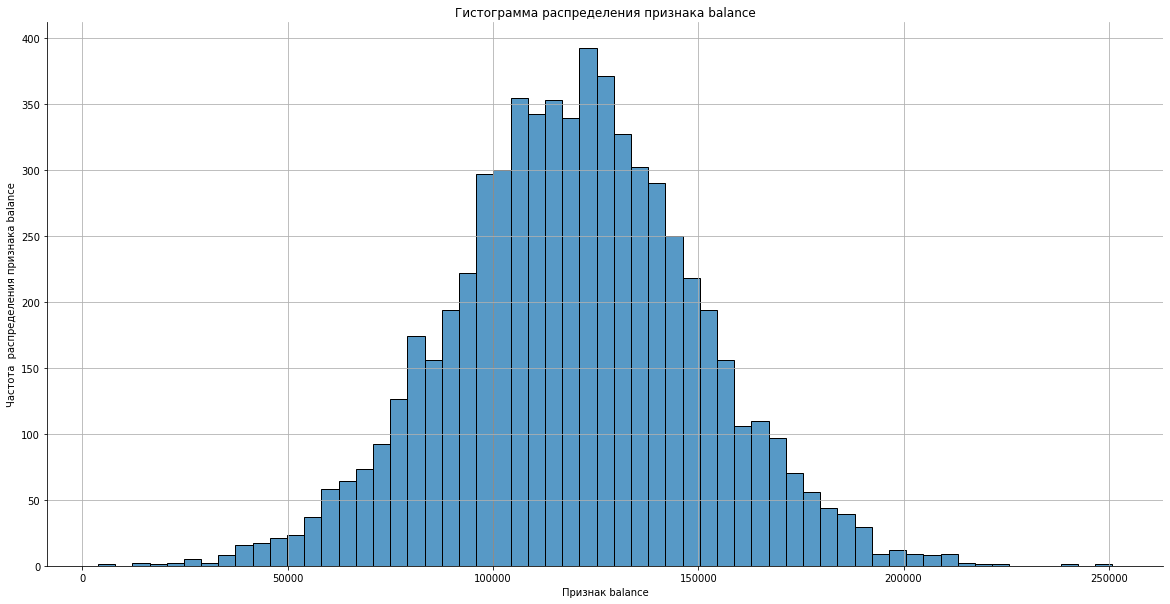

In [14]:
# посмотрим на распределение баланса для тех, у кого он не равен NaN
print(data[data['balance'].notna()]['balance'].describe())

# посмотрим гистограмму
show_chart(data[data['balance'].notna()],'balance',False)

Среди всех пользователей, у 36.17% клиентов банка отсутствуют данные о  балансе их лицевого счета, таким образом, необходимо тем или иным образом обработать пропуски. Замена их на нулевые значения может исказить данные(учитывая, что данные имеющиеся данные имеют нормальное распределение).

In [15]:
# посмотрим на характеристики признаков
empty_balance.loc[:, empty_balance.columns != 'balance'].describe()





,userid,score,city,gender,age,objects,products,creditcard,loyalty,estimated_salary,churn
count,3.617000e+03,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000
mean,1.573469e+07,649.452861,1.662980,0.542715,38.434891,5.071330,1.784628,0.716616,0.517832,98983.559549,0.138236
std,7.194749e+04,96.158798,0.941628,0.498241,10.492002,2.860781,0.496455,0.450704,0.499751,57730.828955,0.345195
min,1.560844e+07,350.000000,1.000000,0.000000,18.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.000000
25%,1.567226e+07,583.000000,1.000000,0.000000,31.000000,3.000000,1.000000,0.000000,0.000000,49506.820000,0.000000
50%,1.573608e+07,651.000000,1.000000,1.000000,37.000000,5.000000,2.000000,1.000000,1.000000,98618.790000,0.000000
75%,1.579629e+07,717.000000,3.000000,1.000000,43.000000,7.000000,2.000000,1.000000,1.000000,148330.970000,0.000000
max,1.585810e+07,850.000000,3.000000,1.000000,88.000000,10.000000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [16]:
# посмотрим на распределение по признакам gender, 'creditcard', 'loyalty', 'churn'
test = empty_balance[['gender', 'creditcard', 'loyalty', 'churn']].T
test[1] = round(
    test.sum(axis=1) / test.count(axis=1) * 100,
    2
)
test[0] = 100 - test[1]
test = test[[0, 1]]
display(test)



,0,1
gender,45.73,54.27
creditcard,28.34,71.66
loyalty,48.22,51.78
churn,86.18,13.82


Признаки gender и loyalty распределены почти равномерно (gender и loyalty), удержание пользователей составляет 86.18% , признак creditcard отмечен  у 71.66% пользователей.

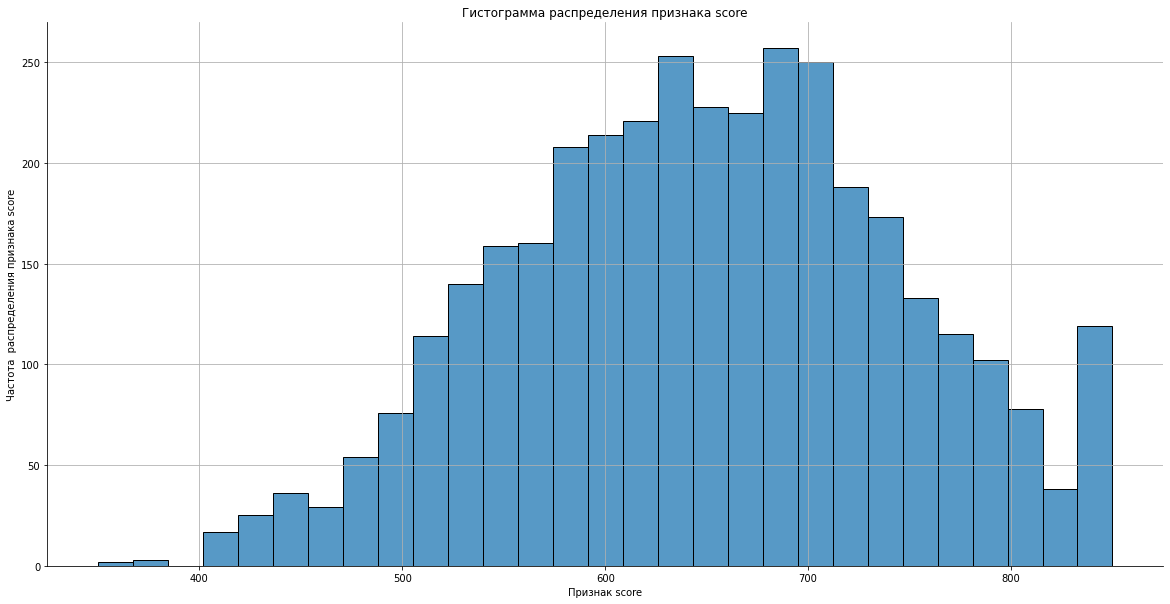

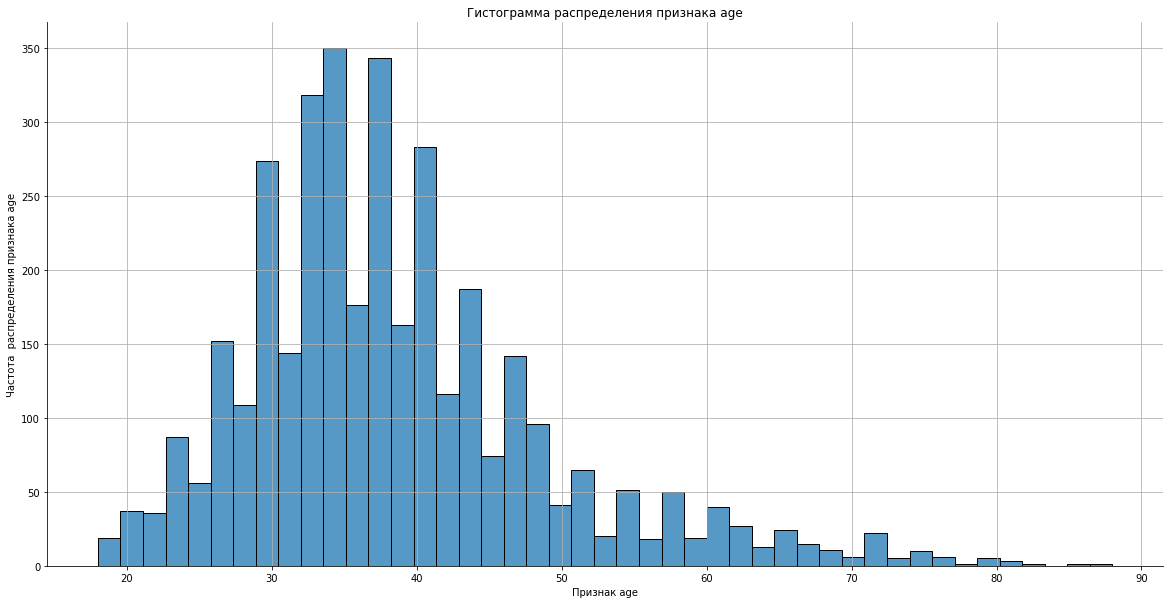

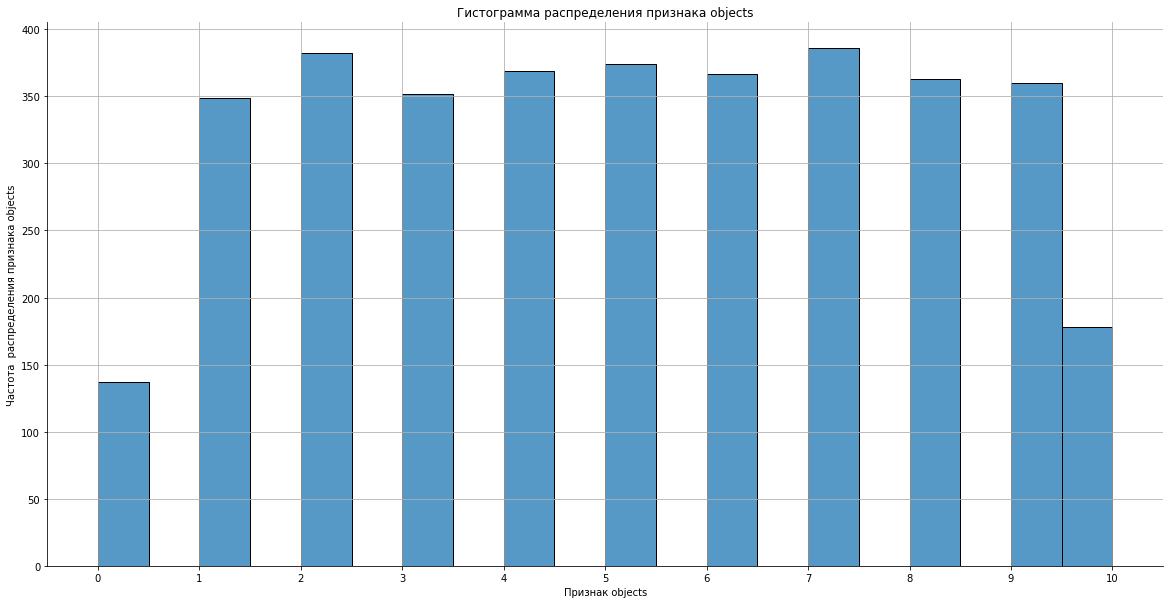

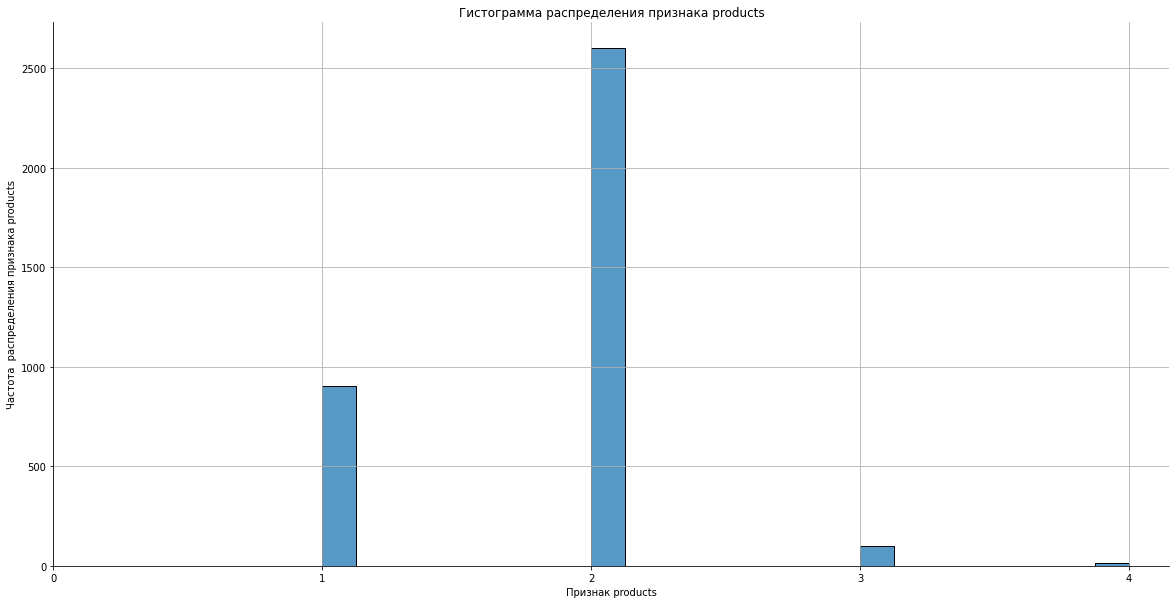

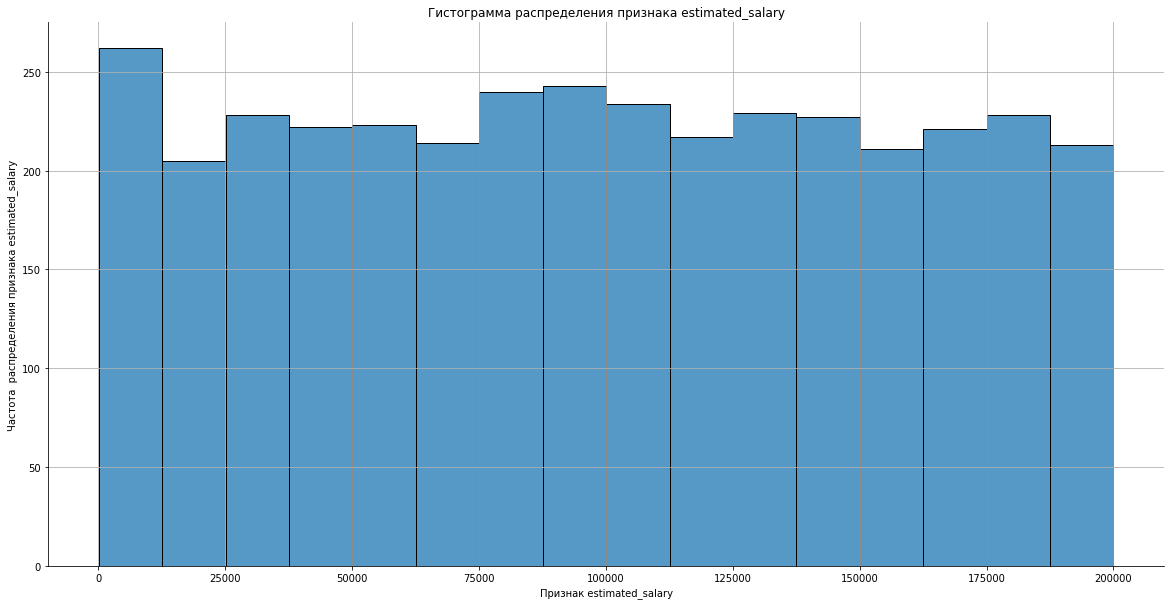

In [17]:
# выведем в цикле гистограммы для  gender, creditcard, loyalty, churn

for i in [
    'score',
    'age',
    'objects',
    'products',
    'estimated_salary'
]:
    show_chart(
        empty_balance,
        i,
        False
    )

    

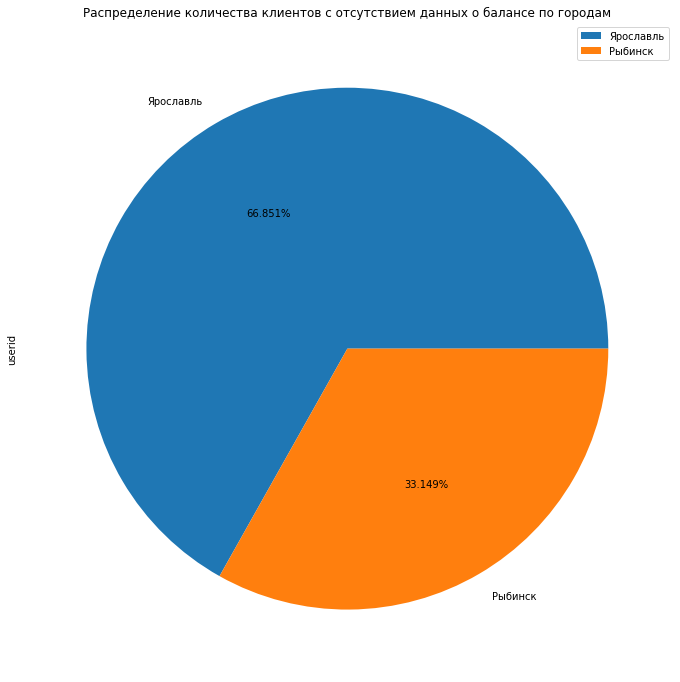

In [18]:
# распределение клиентов по городам для наглядности отобразим на pieplot'е
ax = empty_balance.groupby('city').agg({'userid':'count'}).plot.pie(
    labels=city_names_charts,
    y='userid',
    figsize=(12,12),
    title='Распределение количества клиентов с отсутствием данных о балансе по городам',
    legend=True,
    autopct='%1.3f%%')

plt.show()

#### Вывод

Данные о кредитном рейтинге, поле, возрасте, заработной плате имеют нормальное распределение;
среди клиентов с отсутствием данных о балансе не представлены жители Ростова Великого;
Наибольшая группа клиентов имеют два продукта(но среди тех кто уходит в отток большая часть имеет один продукт) 
Пропущенные данные в столбце balance скорее всего имеют  случайное происхождение, и возможно связано с технической ошибкой.Учитывая объем пропущенных значений(36.17%) мы не можем их отбросить или заполнить средним или медианным значением, поэтому логичным будет ввести переменную (-322).

In [19]:
# заполним пропуски
data.fillna(-322, inplace=True)

In [20]:
#Приведём данные к нужным типам
for i in data.columns:
    try:
        if type(data[i][0]) == np.int64:
            data[i] = pd.to_numeric(data[i], downcast='unsigned')
        elif type(data[i][0]) == np.float64:
            data[i] = pd.to_numeric(data[i], downcast='float')
    except:
        print(f'Проверь данные в столбце {i}, там остались не числовые данные')

In [21]:
# Еще раз взглянем на данные, чтобы оценить результаты предобработки 
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  uint32 
 1   score             10000 non-null  uint16 
 2   city              10000 non-null  uint8  
 3   gender            10000 non-null  uint8  
 4   age               10000 non-null  uint8  
 5   objects           10000 non-null  uint8  
 6   balance           10000 non-null  float32
 7   products          10000 non-null  uint8  
 8   creditcard        10000 non-null  uint8  
 9   loyalty           10000 non-null  uint8  
 10  estimated_salary  10000 non-null  float32
 11  churn             10000 non-null  uint8  
dtypes: float32(2), uint16(1), uint32(1), uint8(8)
memory usage: 215.0 KB
None


In [22]:
# Выведем первые 10 строк
display(data.head(10))

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,1,0,42,2,-322.000000,1,1,1,101348.882812,1
1,15690047,608,3,0,41,1,83807.859375,1,0,1,112542.578125,0
2,15662040,502,1,0,42,8,159660.796875,3,1,0,113931.570312,1
3,15744090,699,1,0,39,1,-322.000000,2,0,0,93826.632812,0
4,15780624,850,3,0,43,2,125510.820312,1,1,1,79084.101562,0
5,15616748,645,3,1,44,8,113755.781250,2,1,0,149756.703125,1
6,15635267,822,1,1,50,7,-322.000000,2,1,1,10062.799805,0
7,15698884,376,2,0,29,4,115046.742188,4,1,0,119346.882812,1
8,15835101,501,1,1,44,4,142051.062500,2,0,1,74940.500000,0
9,15635125,684,1,1,27,2,134603.875000,1,1,1,71725.726562,0


Вывод
Мы привели  название колонок к "змеиному регистру",данные к необходимым типам, отбросили информацию о клиентах без сведений о их балансе по счету(но сохранили возможность для бэкапа данных), в результате предобработки, можно сказать, что пропуски носили случайных характер(возможно связаны с технической ошибкой)

### Исследовательский анализ данных

#### Распределение клиентов банка на категориям

In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
userid,10000.0,1.573368e+07,71936.186123,15608437.00,1.567126e+07,1.573347e+07,1.579597e+07,1.585843e+07
score,10000.0,6.505288e+02,96.653299,350.00,5.840000e+02,6.520000e+02,7.180000e+02,8.500000e+02
city,10000.0,1.746300e+00,0.827529,1.00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
gender,10000.0,5.457000e-01,0.497932,0.00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
age,10000.0,3.892180e+01,10.487806,18.00,3.200000e+01,3.700000e+01,4.400000e+01,9.200000e+01
objects,10000.0,5.012800e+00,2.892174,0.00,3.000000e+00,5.000000e+00,7.000000e+00,1.000000e+01
balance,10000.0,7.636942e+04,62540.210938,-322.00,-3.220000e+02,9.719854e+04,1.276442e+05,2.508981e+05
products,10000.0,1.530200e+00,0.581654,1.00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
creditcard,10000.0,7.055000e-01,0.455840,0.00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
loyalty,10000.0,5.151000e-01,0.499797,0.00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


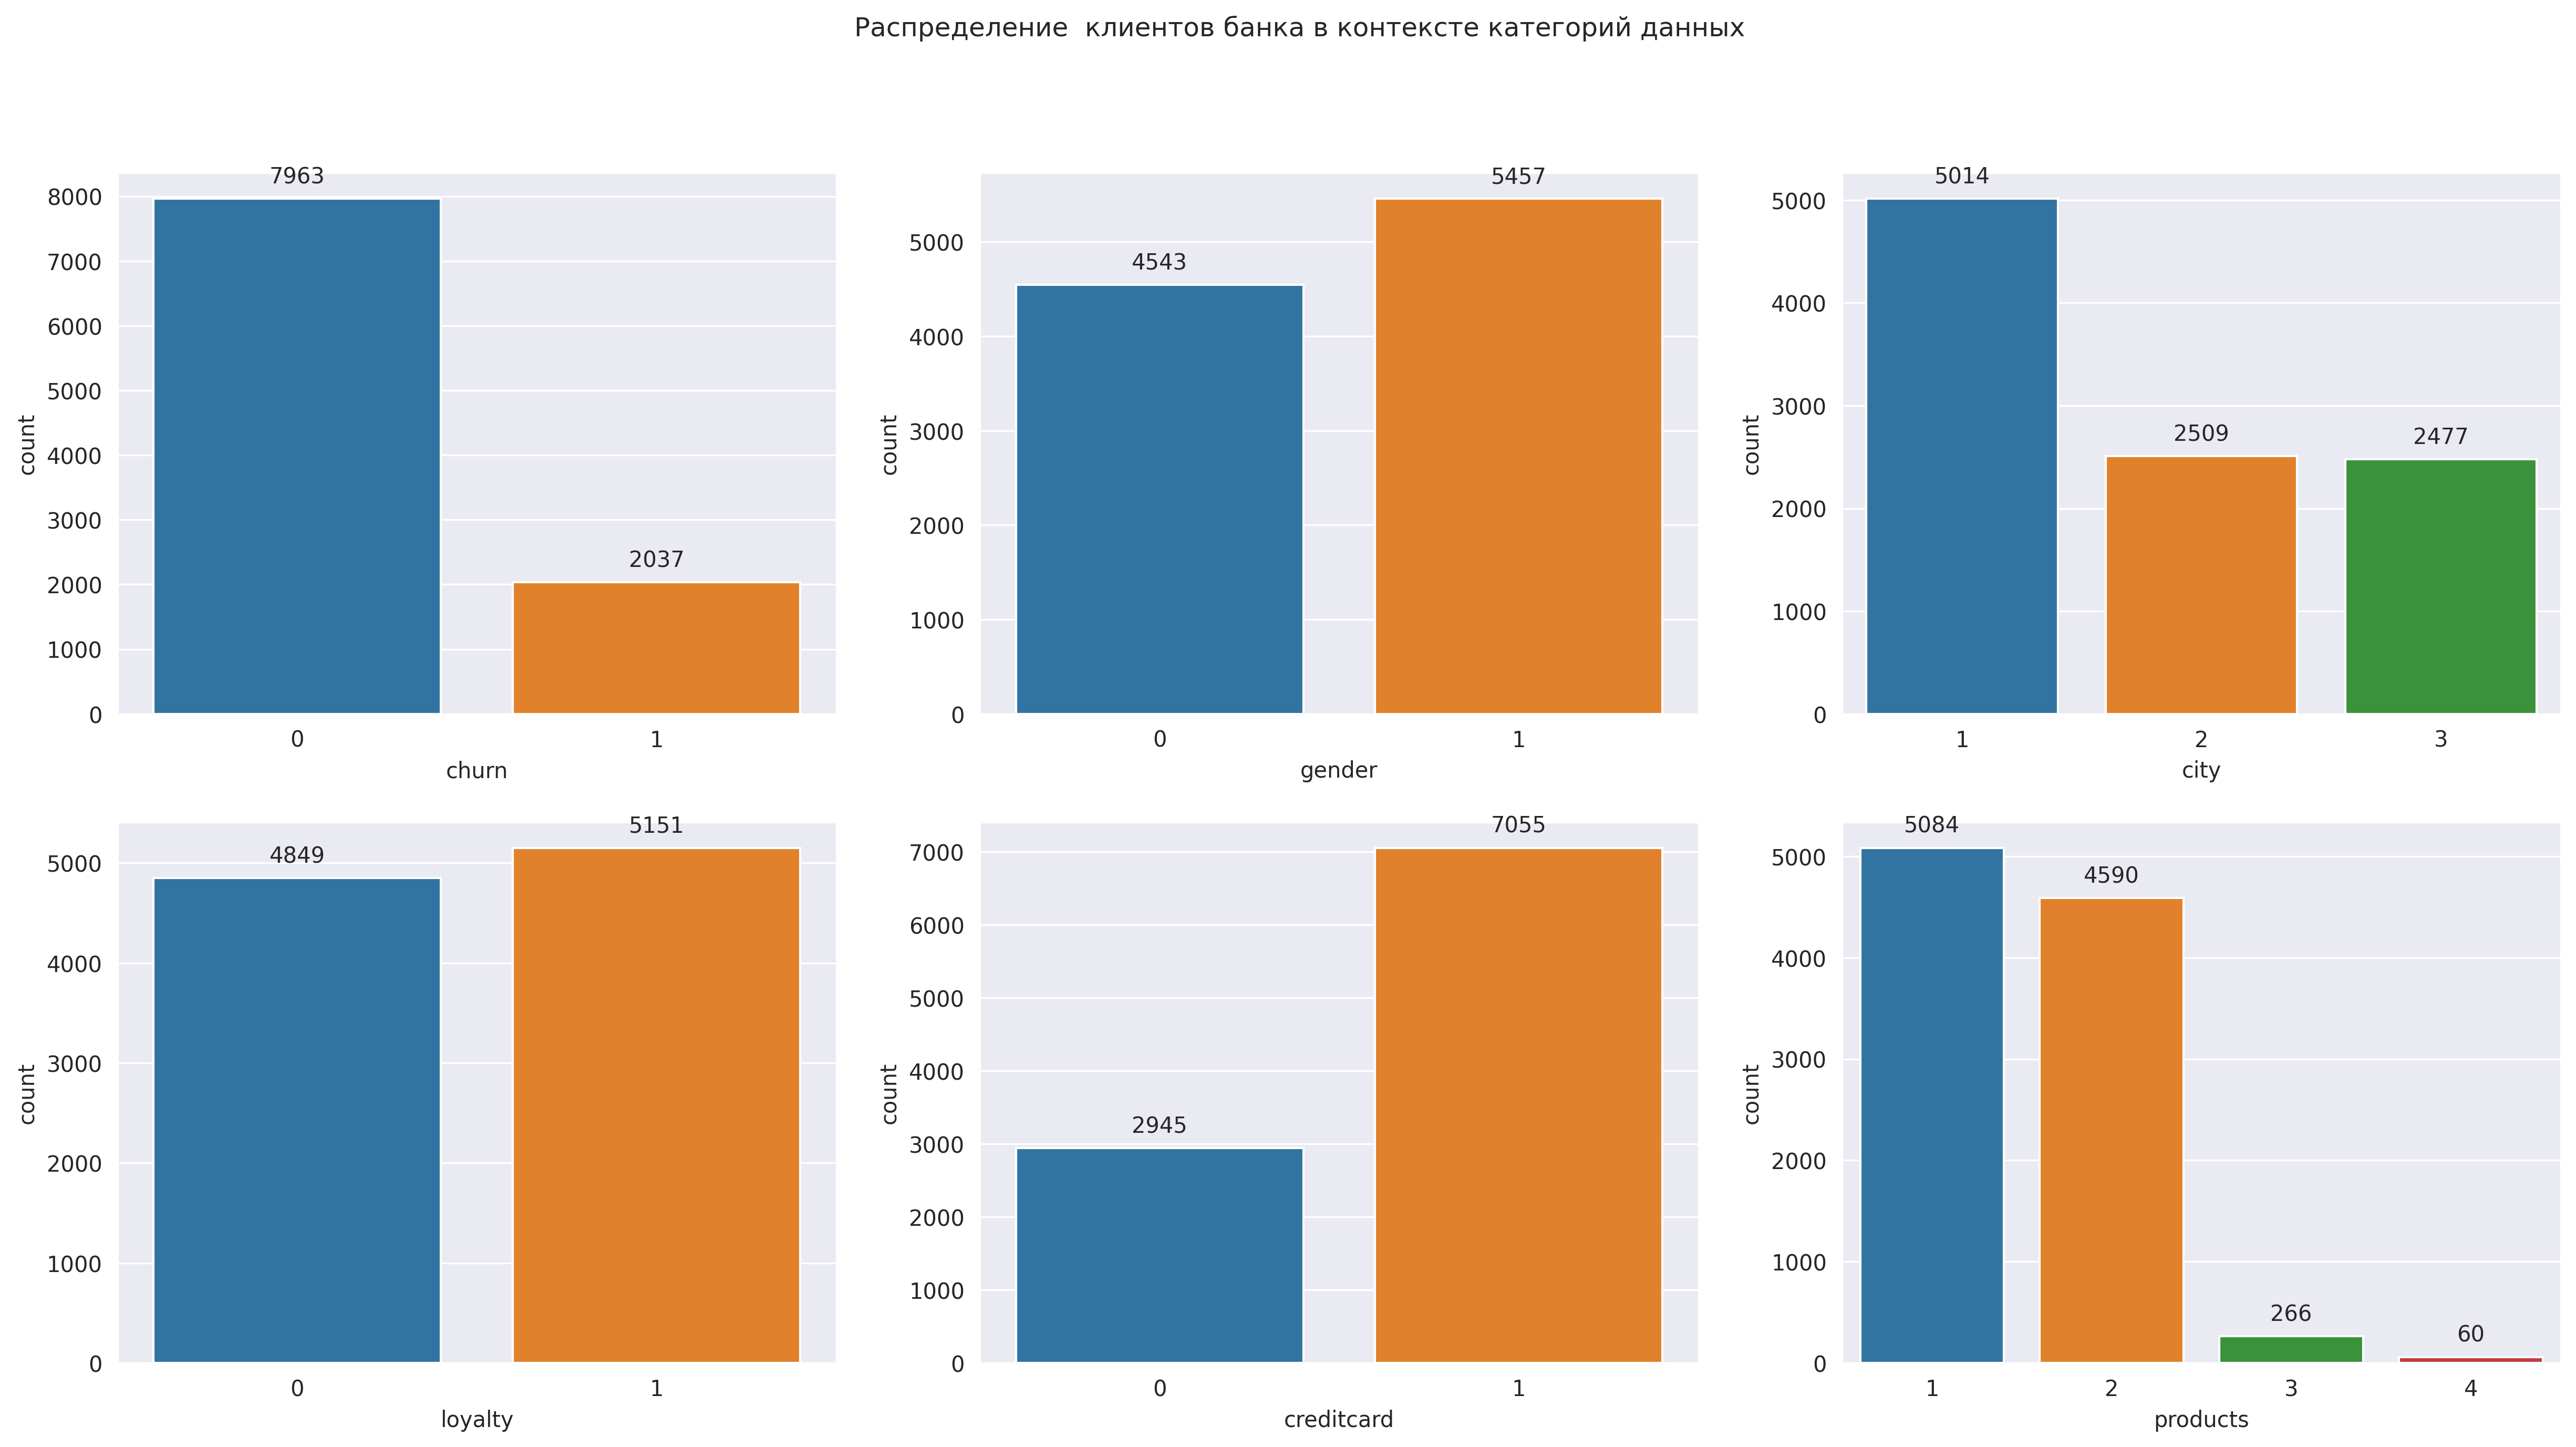

In [24]:
sns.set_style("darkgrid")
column_list = ['churn','gender','city','loyalty', 'creditcard',  'products']

fig, ax = plt.subplots(2, 3)
fig.set_size_inches(20, 10) 
fig.set_dpi(300)
for variable, subplot in zip(column_list, ax.flatten()):
    splot = sns.countplot(data[variable], ax=subplot)
    for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
fig.suptitle('Распределение  клиентов банка в контексте категорий данных');



<div class='alert alert-success'> 👍
Хорошая визуализация данных, тебе удалось автоматизировать процесс отрисовки, сами графики весьма аккуратные. Мне понравилось как ты использовал возможность располагать графики на сетке с помощью с субплотов, это позволяет экономить пространство и улучшает восприятие.


На основе анализа данных можно утверждать что:
Большая часть клиентов находится в Ярославле, на втором месте Ростов Великий и далее идет Рыбинск с небольшим отставанием.
средний возраст банка составляет 39 лет,минимальнье и максимальные значения 18 лет и 92 года соответственно;
заработная плата клиентов  варьируется в диапазоне 11.5 тысяч - 199 тысяч, а в среднем составляет 100 тысяч; 
средний кредитный  рейтинг составляет 650(что позволяет получить кредит в большинстве случаев);
отток клиентов составляет 20,37 %, что довольно много, особенно для банка;
в среднем у клиентов банка 5 объектов недвижимости в собственности.


#### Разделим клиентов на  две группы — тех, кто ушел в отток и тех, кто остался;

In [25]:
# изучим сводную информацию о признаках (кроме balance, мы его уже изучали ранее)
display(data.loc[:, data.columns != 'balance'].describe())





,userid,score,city,gender,age,objects,products,creditcard,loyalty,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,1.746300,0.545700,38.921800,5.012800,1.530200,0.70550,0.515100,100090.234375,0.203700
std,7.193619e+04,96.653299,0.827529,0.497932,10.487806,2.892174,0.581654,0.45584,0.499797,57510.492188,0.402769
min,1.560844e+07,350.000000,1.000000,0.000000,18.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,1.000000,0.000000,32.000000,3.000000,1.000000,0.00000,0.000000,51002.109375,0.000000
50%,1.573347e+07,652.000000,1.000000,1.000000,37.000000,5.000000,1.000000,1.00000,1.000000,100193.914062,0.000000
75%,1.579597e+07,718.000000,2.000000,1.000000,44.000000,7.000000,2.000000,1.00000,1.000000,149388.253906,0.000000
max,1.585843e+07,850.000000,3.000000,1.000000,92.000000,10.000000,4.000000,1.00000,1.000000,199992.484375,1.000000


In [26]:
data['city'].value_counts(True)

1    0.5014
2    0.2509
3    0.2477
Name: city, dtype: float64

#### Рассмотрим показатели ушедших и оставшихся клиентов

In [27]:
#Рассчитаем средние значения признаков для групп с оттоком и без
display(data.pivot_table(index='churn', aggfunc='mean').T.apply(lambda s: s.apply('{0:.2f}'.format)))


churn,0,1
age,37.41,44.84
balance,72619.26,91029.50
city,1.73,1.81
creditcard,0.71,0.70
estimated_salary,99738.39,101465.68
gender,0.57,0.44
loyalty,0.55,0.36
objects,5.03,4.93
products,1.54,1.48
score,651.85,645.35


средний клиент со имеет кредитный рейтинг (score) 650;
География распределения  клиентов выглядит так: 50,14% клиентов из Ярославля (1), в Ростове(2) 25.09 % и в Рыбинске(3) 24.77%.
пол 50/50;
возраст в среднем 38.9 лет(такой же как медианный возраст в стране);
в среднем клиенты имеют 5 объектов в собственности;
в среденем клиент использует менее двух продуктов банка(1,53) ;
в среднем есть одна кредитная карта(0,7);
половина из клиентов лояльны;
зарплата в среднем около 100 000 ;
к оттоку склоны 20.3%.

#### Построим графики и распределения признаков для тех, кто ушёл и тех, кто остался

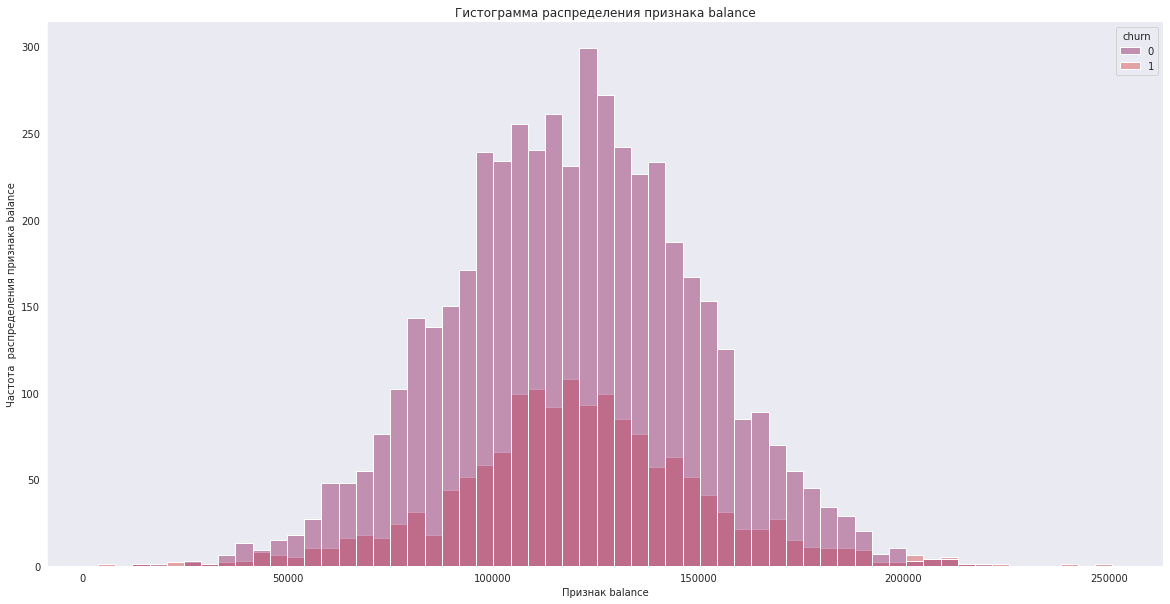

In [28]:
#Построим графики распределения по признакам, 
#начиная с признака balance(учитывая только пользователей с ненулевым балансоом)признаков в разрезе оттока
show_chart(data.query('balance > 0'),'balance',True,'churn')




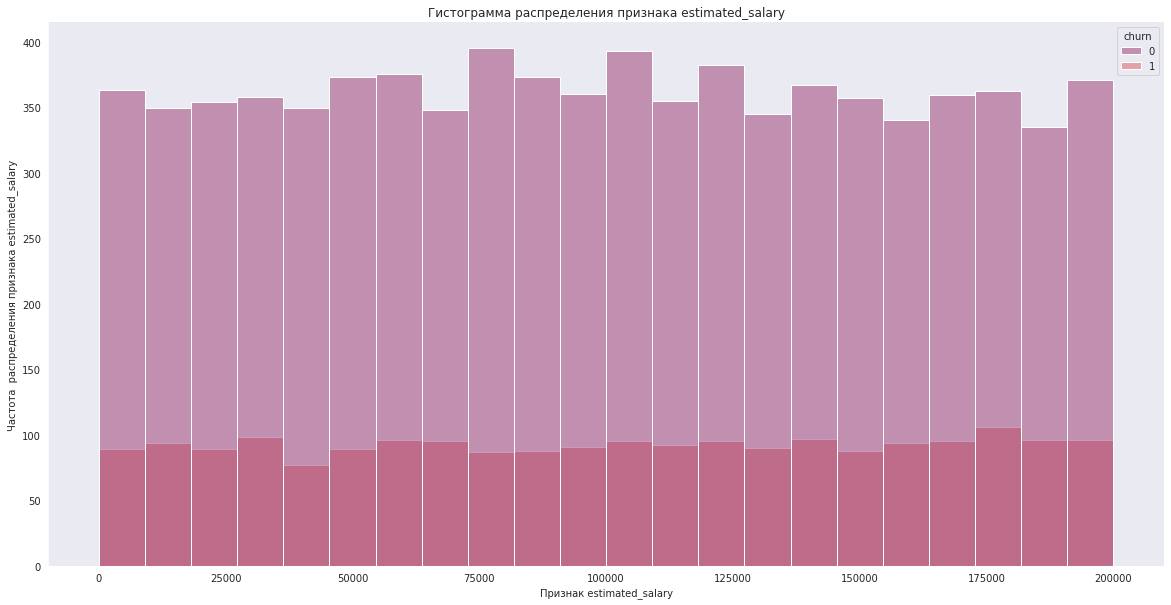

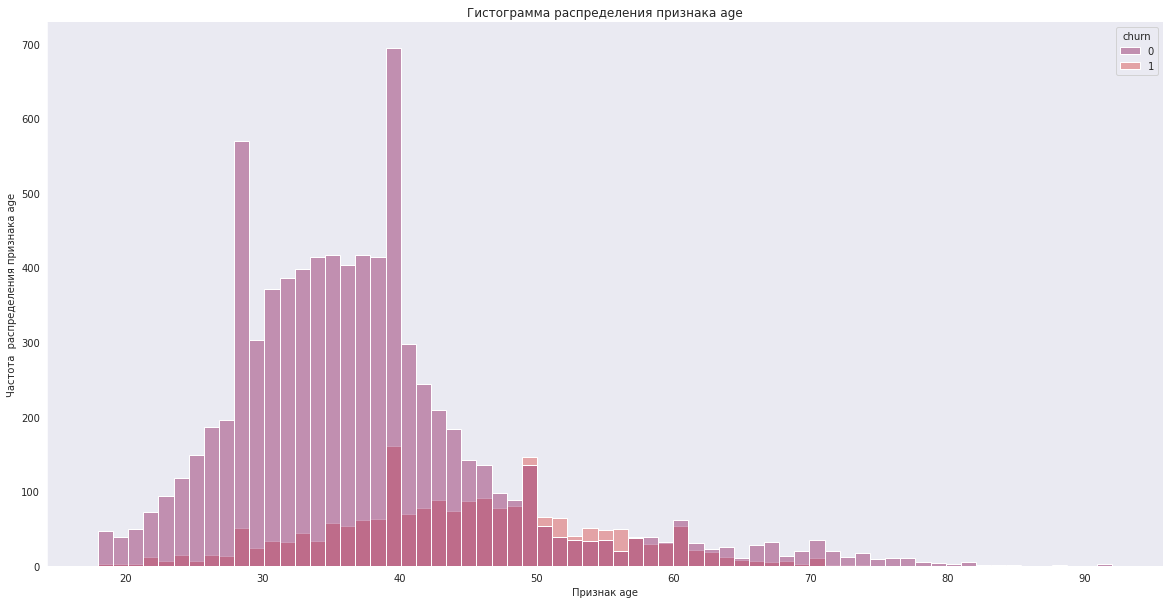

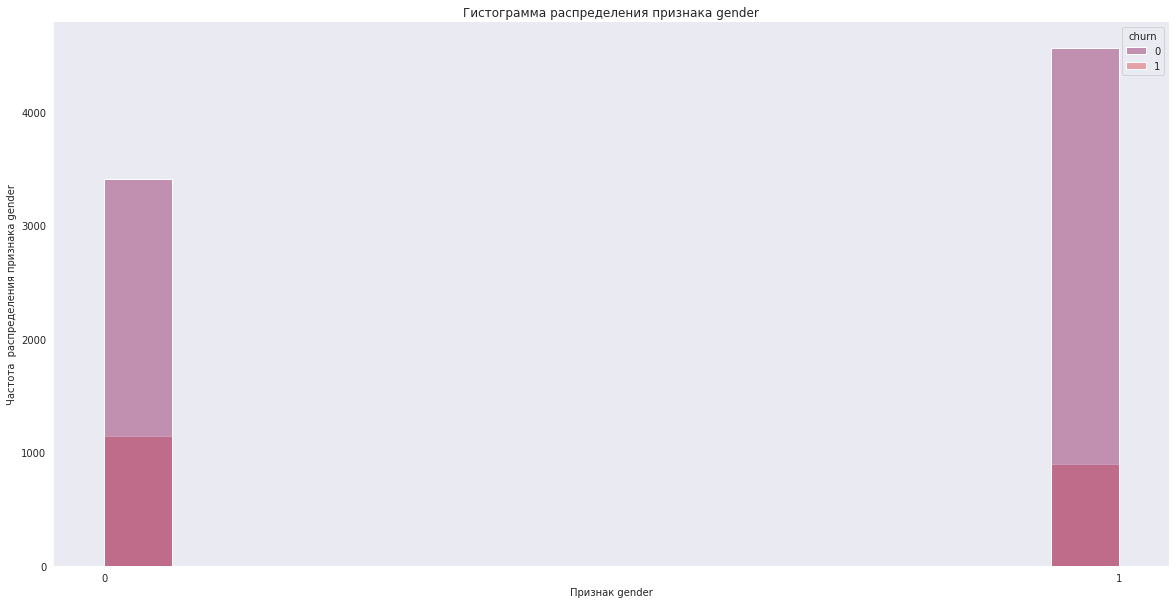

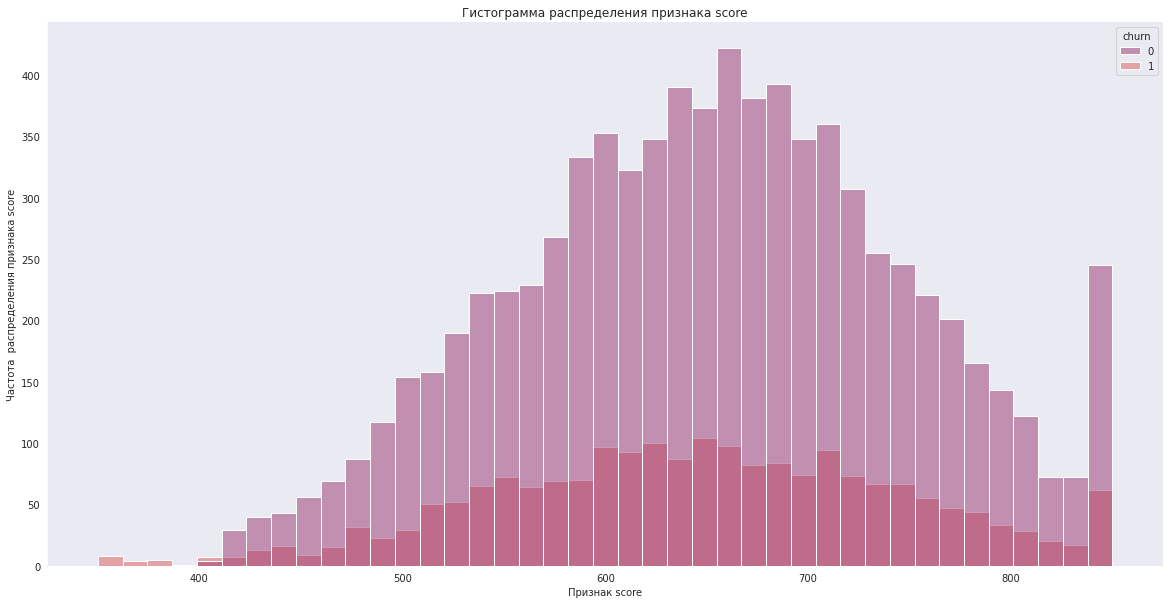

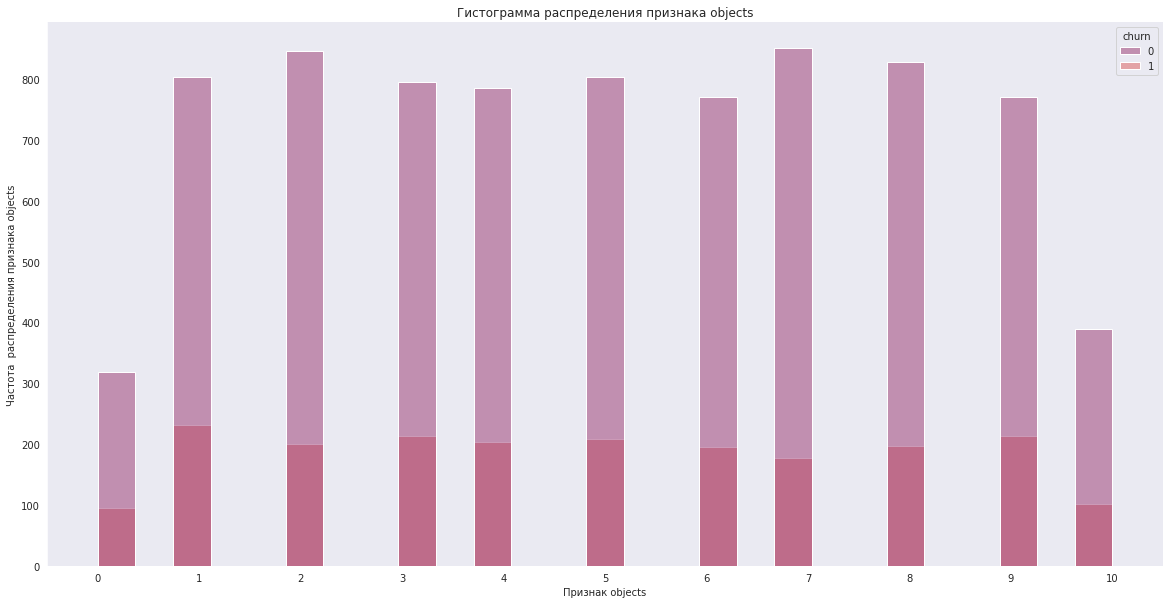

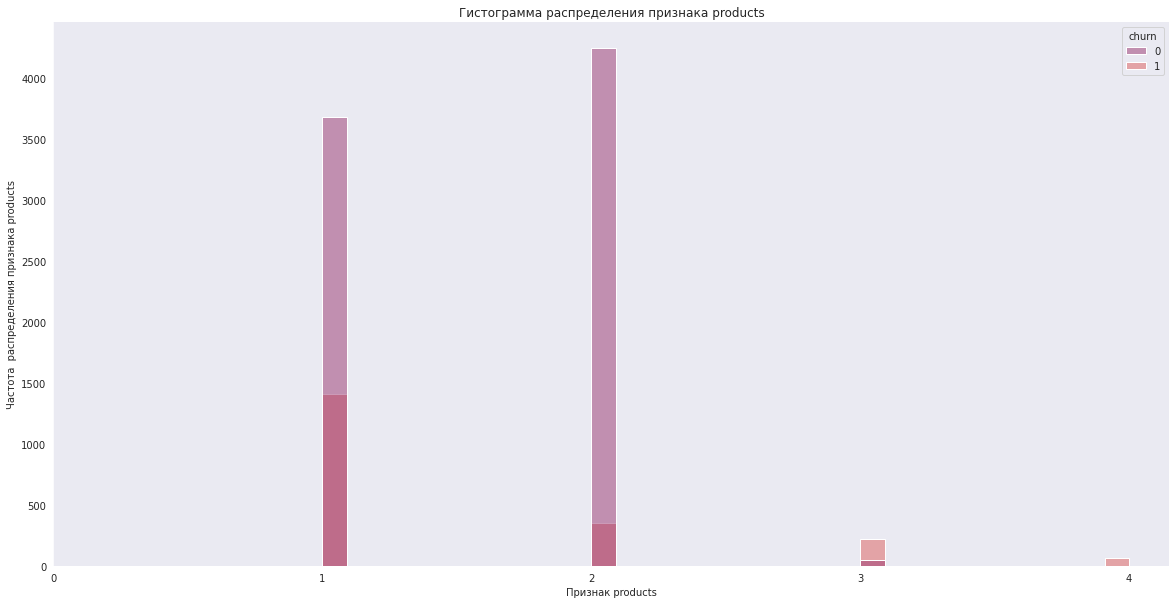

In [29]:
# также выведем распределение остальных признаков
for i in ['estimated_salary','age','gender','score','objects','products']:
    show_chart(data,i,True,'churn')
    
    
    
    

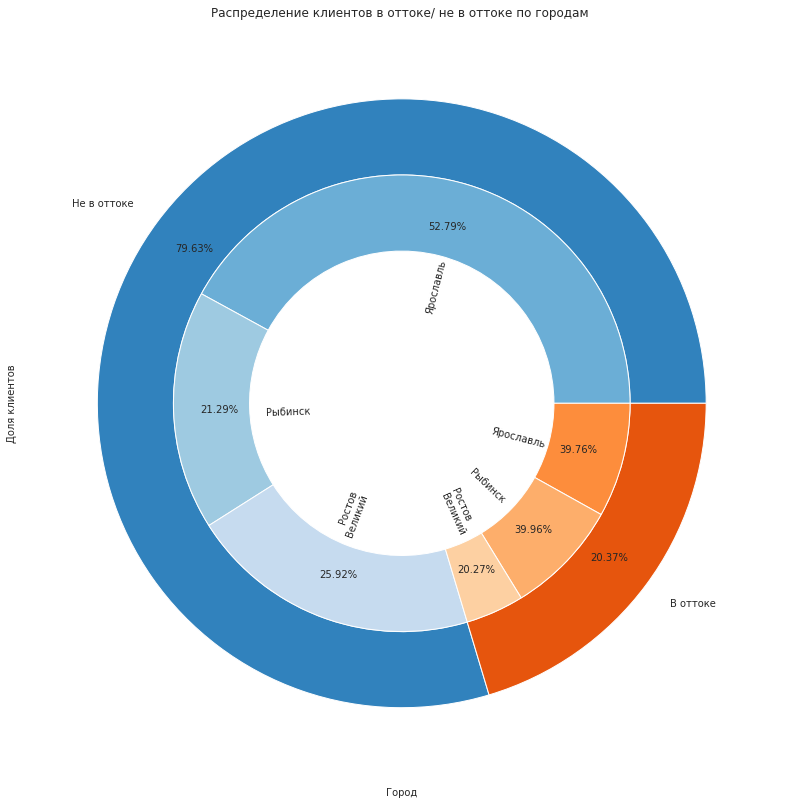

In [30]:
fig, ax = plt.subplots()

fig.set_figwidth(14)
fig.set_figheight(14)

size = 0.25
vals = np.array(
    [
        list(data.query('churn == 0').groupby('city').agg({'userid':'count'})['userid']),
        list(data.query('churn == 1').groupby('city').agg({'userid':'count'})['userid'])
    ]
)


def make_autopct(values, churn):
    def my_autopct(pct):
        total = sum(vals.flatten())
        val = pct * total / sum(vals[churn])
        return '{v:.2f}%'.format(v=val)
    return my_autopct

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(2)*4)
inner_colors = [
    cmap([1, 2, 3]),
    cmap([5, 6, 7])
]

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.2f%%', labels=['Не в оттоке', 'В оттоке'], pctdistance=0.85)

for i in [0, 1]:
    part_vals = vals[i] / sum(vals.flatten())
    ax.pie(
        part_vals,
        radius=1-size,
        colors=inner_colors[i],
        normalize=False,
        wedgeprops=dict(width=size, edgecolor='w'),
        autopct=make_autopct(part_vals, i),
        labels=city_names_charts,
        pctdistance=0.8,
        labeldistance=0.4,
        rotatelabels=True,
        counterclock=bool(not i)
    )

ax.set(aspect="equal", title='Распределение клиентов в оттоке/ не в оттоке по городам ', xlabel='Город', ylabel='Доля клиентов')

plt.show()

#### Выводы:
Также можно отметить низкий кредитный рейтинг(ниже 100 при среднем в 650) у пользователей ушедших в отток ;
в  Ярославле(1) и Рыбинске(3)  клиенты уходят в два разачаще чем, в  Ростове Великом(2)
женщины чуть более склонны к оттоку;
наиболее склонны к оттоку люди в возрасте 50-60 лет;
доход по счёту, баланс и количество объектов не влияет на отток;
у ушедших клиентов количество продуктов в среднем выше;
количество кредитных карт возможно связано с оттоком;
низкая лояльность у клиентов ушедших в отток.
весьма равномерная заработная плата клиента у всех клиентов

#### Построим матрицу корреляций и  определим признаки которые могут влиять на отток

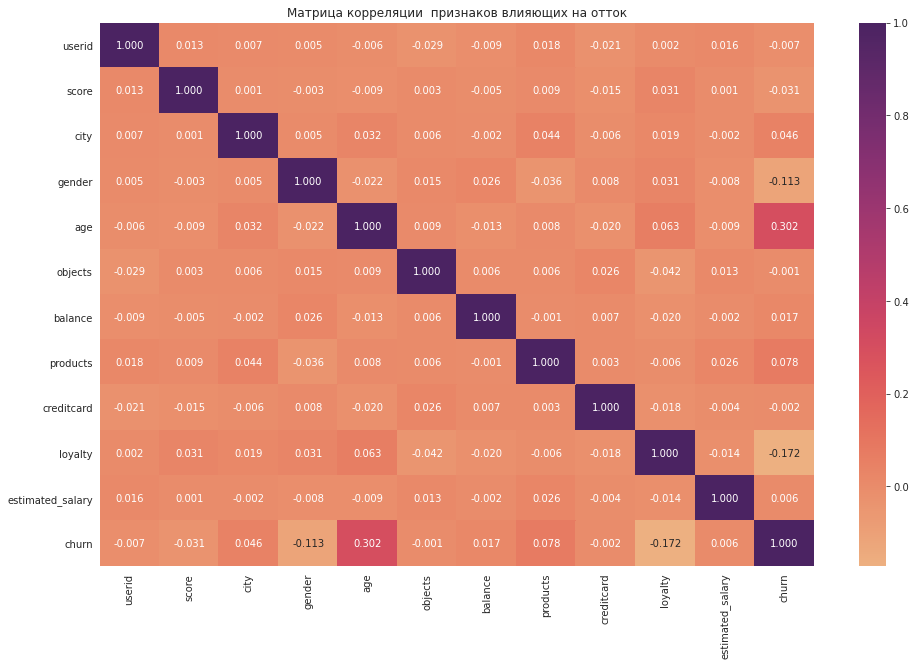

In [31]:
# рассчитываем матрицу
corr_matrix = data.query('balance > 0').corr()

# Выведем результаты с помощью хитмэпа 
plt.figure(figsize=(16, 10))
plt.title('Матрица корреляции  признаков влияющих на отток')
ax=sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.3f',
    cmap='flare'
)
plt.show()


#### Выводы

Как видно из матрицы, наибольшая корреляция с  оттоком клиентов у  признака age (0,302), но в целом это не указывает на прямую зависимость.
Показатели loyalty (-0,172) и gender  (-0,113) показывают отрицательную корелляцию;


### Сегментация пользователей

Проведем сегментацию клиентов по имеющимся показателям

In [32]:
data.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'creditcard', 'loyalty', 'estimated_salary', 'churn'],
      dtype='object')

Text(0, 0.5, 'количество клиентов')

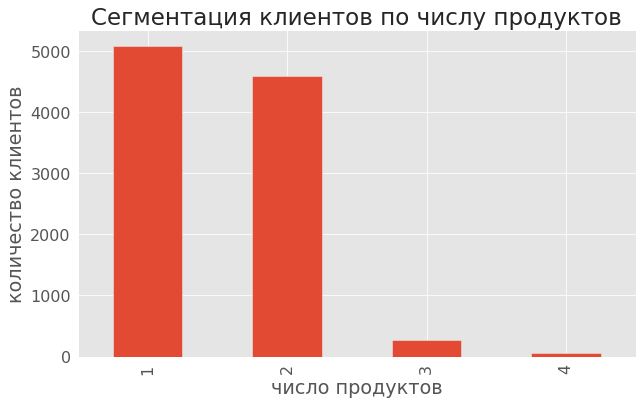

In [33]:
#Сегментация по числу продуктов
plt.style.use('ggplot')

plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (10,6)

data.groupby('products')['age'].count().plot(kind='bar').set_title('Сегментация клиентов по числу продуктов')
plt.xlabel('число продуктов') 
plt.ylabel('количество клиентов')

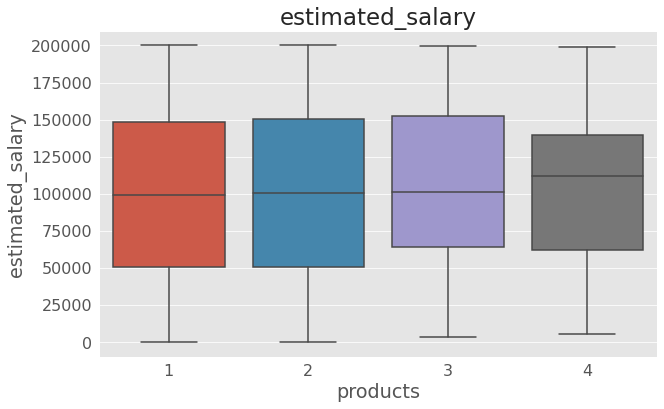

In [34]:
#Сегментация по зарплате
for i in ['estimated_salary']:
    sns.boxplot(x='products',y=i, data=data).set_title(i)
    plt.show() 
    

Основная часть клиентов пользуется 1 или 2 продуктами.

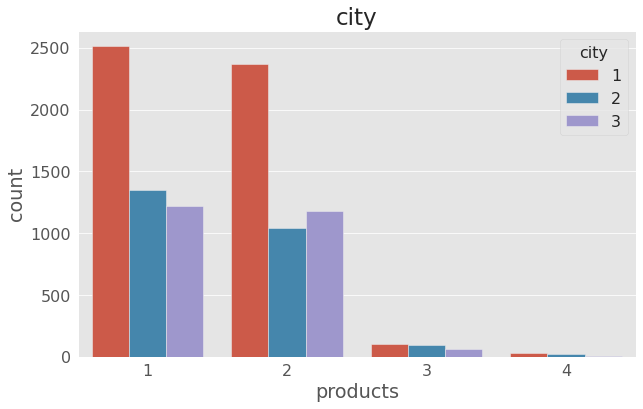

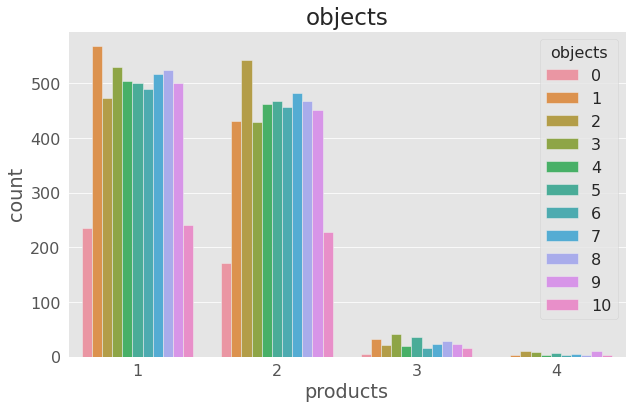

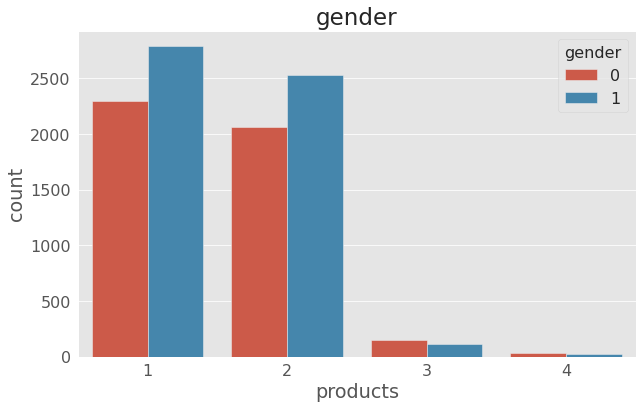

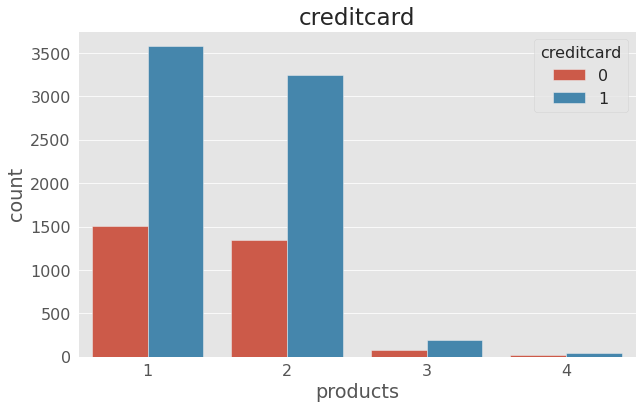

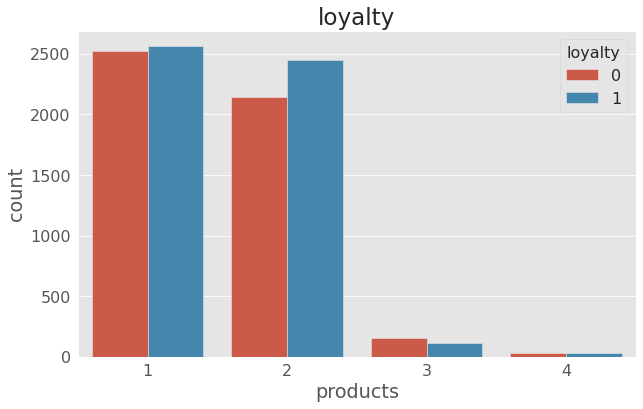

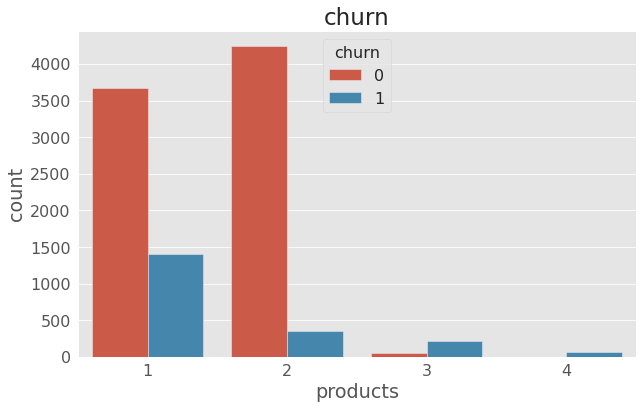

In [35]:
for i in ['city','objects', 'gender', 'creditcard', 'loyalty', 'churn']:
    sns.countplot(x='products', hue=i, data=data).set_title(i)
    plt.show()
    
    
    

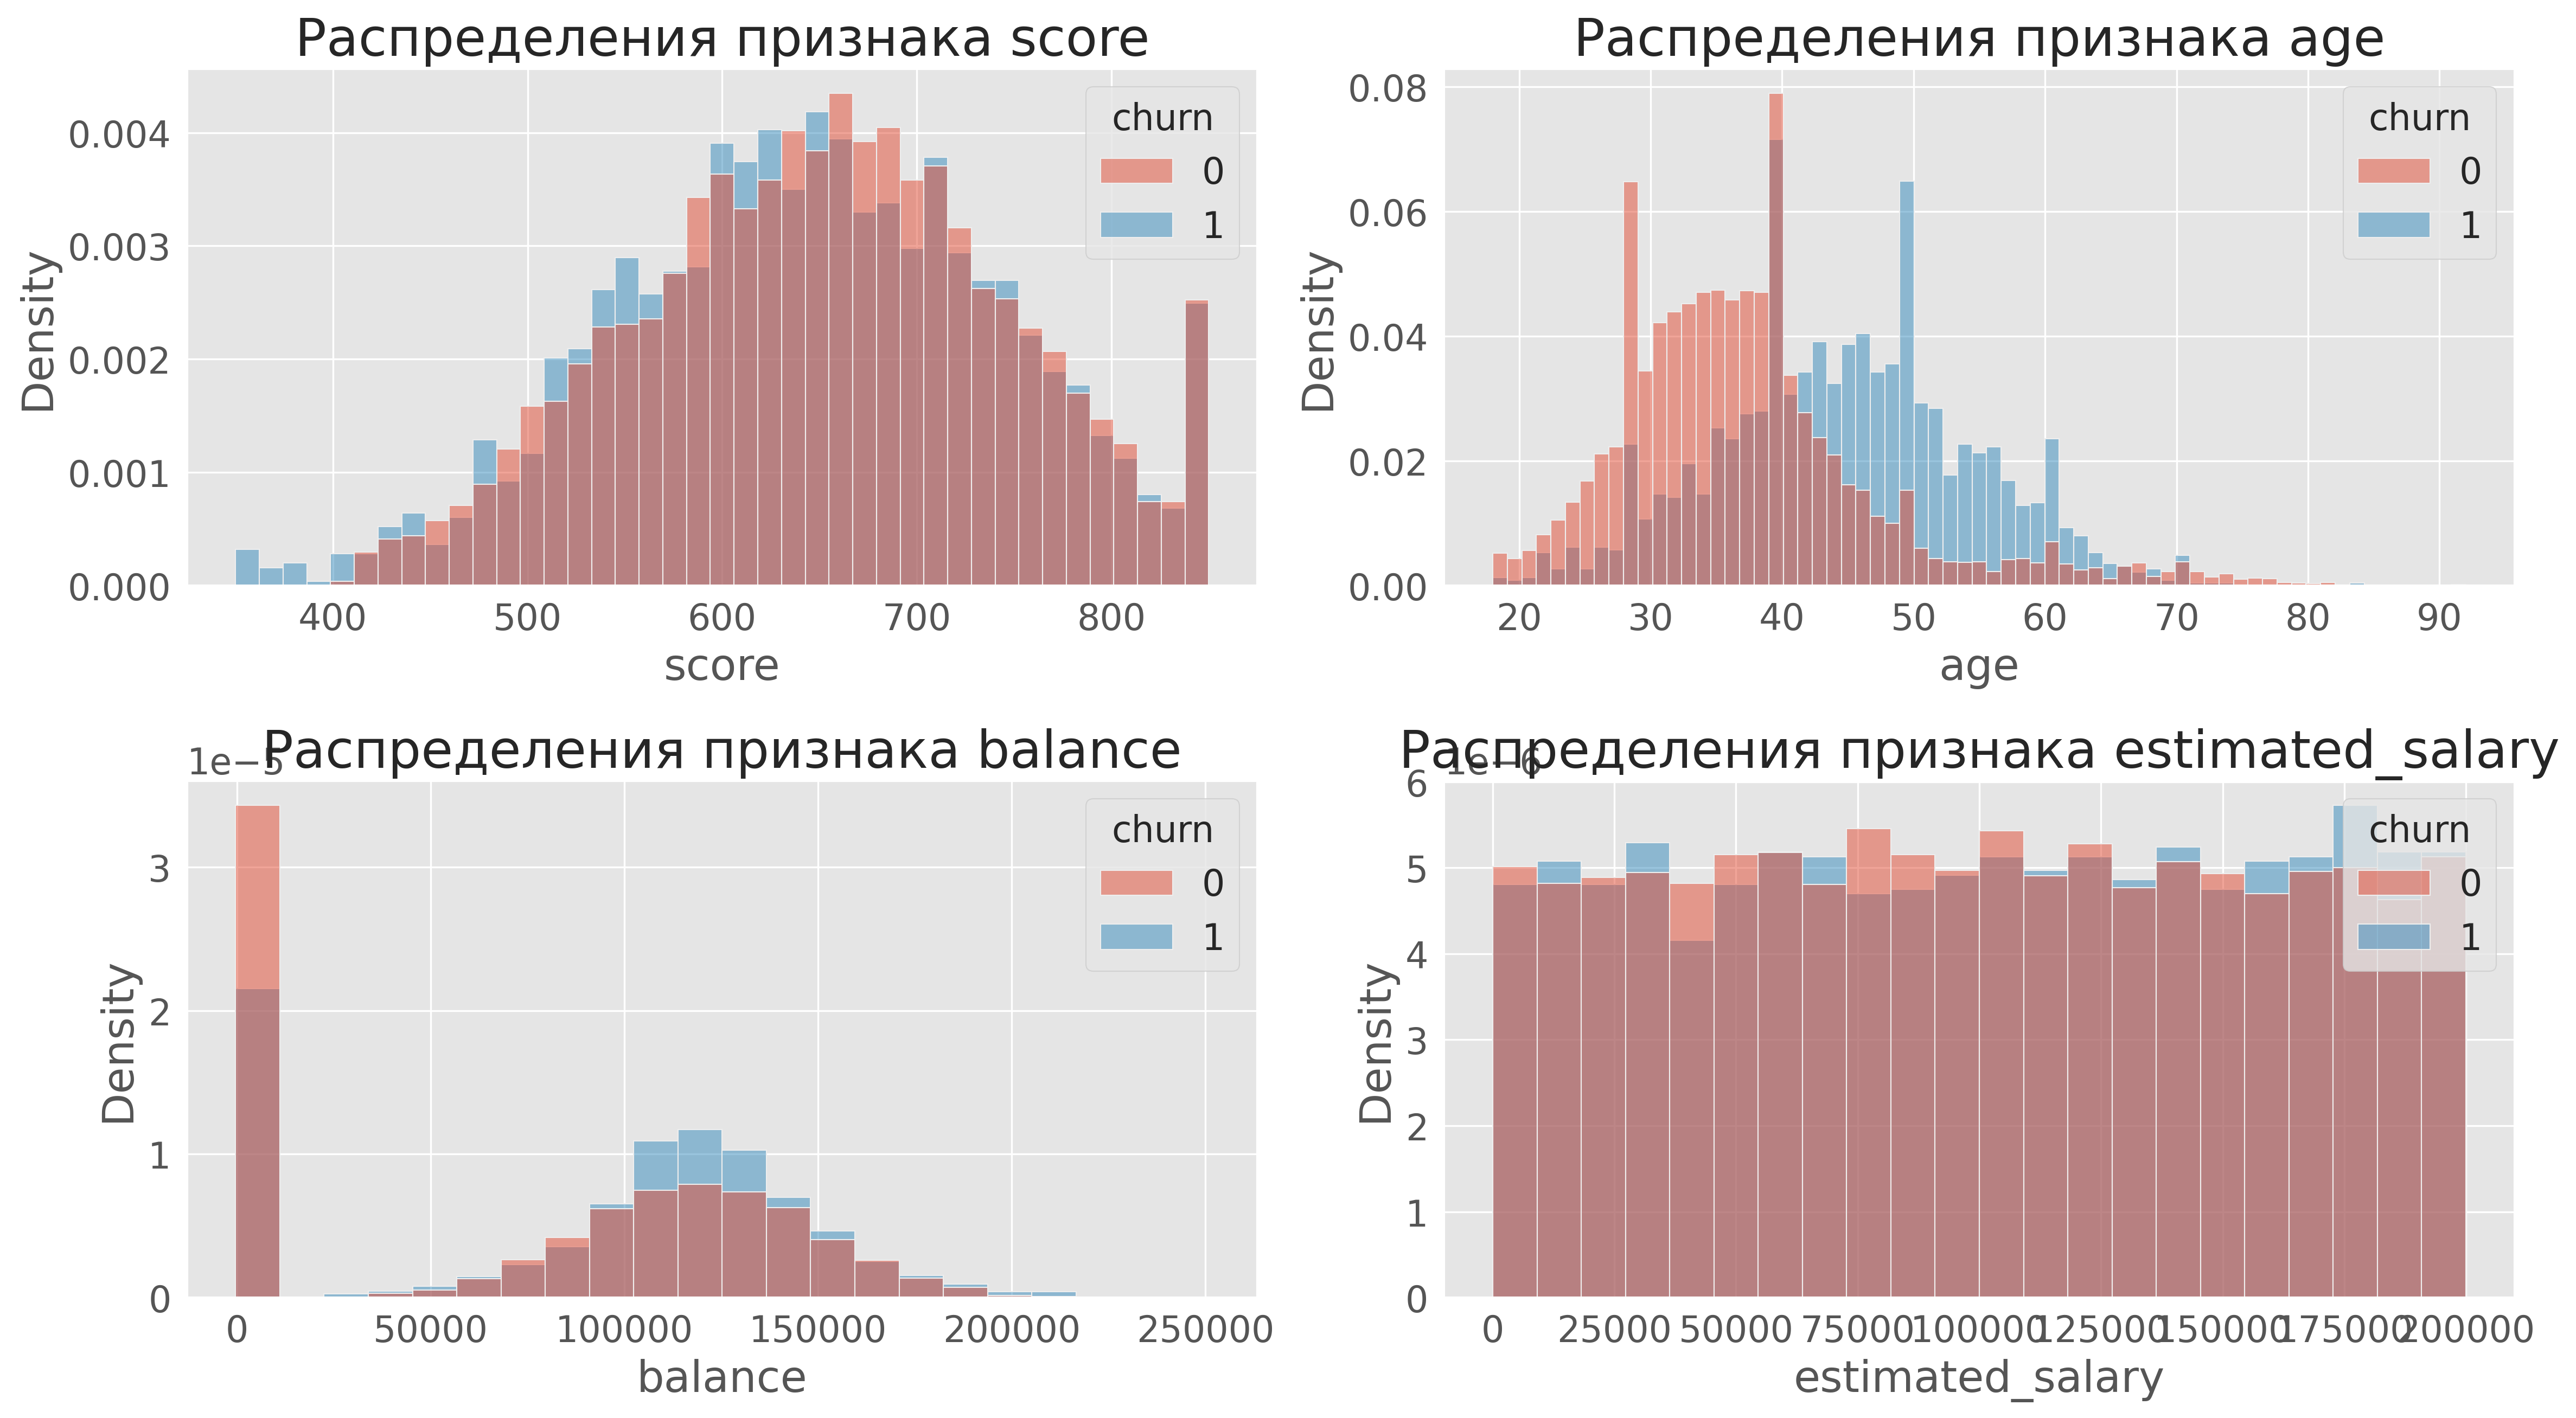

In [36]:
columns_list = ['score', 'age', 'balance', 'estimated_salary']

fig, axs = plt.subplots(len(columns_list) // 2, 2)
fig.set_size_inches(16, 9) 
fig.set_dpi(300)

new_axs = [item for sublist in axs for item in sublist]

for i, column in enumerate(columns_list):
    sns.histplot(data=data, x=column,  stat='density', hue = 'churn', common_norm=False,  ax=new_axs[i])
    new_axs[i].set_title('Распределения признака {}'.format(column))

plt.tight_layout()
plt.show();



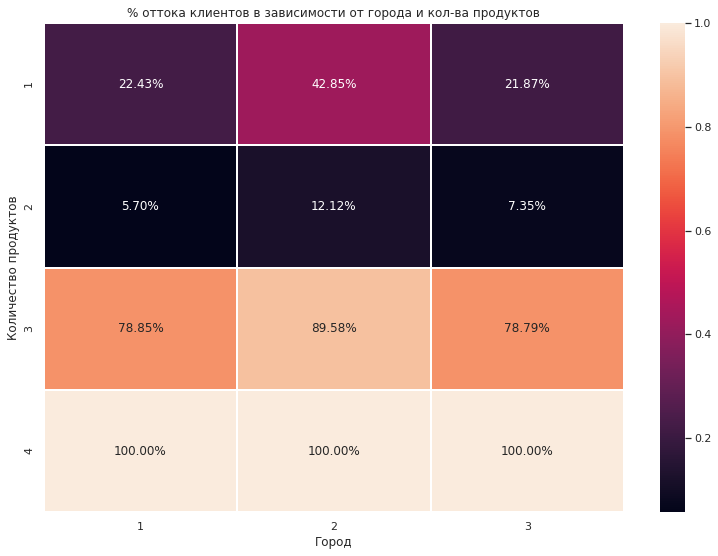

In [37]:
data_pivot = data.pivot_table(index='products', columns='city', values='churn', aggfunc='mean')

sns.set(style='dark')
plt.figure(figsize=(13, 9))
plt.title('% оттока клиентов в зависимости от города и кол-ва продуктов')
sns.heatmap(data_pivot, annot=True, fmt='.2%', linewidths=1, linecolor='white')
plt.xlabel('Город') 
plt.ylabel('Количество продуктов'); 


В Ростове Великом показатели  оттока выше в каждой группе . Отток в группах с 1 продкуктом почти в два раза выше, а с  2  продуктами более, чем в два раза превышает показатели Ярославля.

In [38]:
data.drop(['userid', 'estimated_salary', 'balance'], axis=1).groupby('products').mean()




,score,city,gender,age,objects,creditcard,loyalty,churn
products,,,,,,,,
1,649.120968,1.745673,0.548387,39.673092,4.974626,0.703777,0.504131,0.277144
2,652.188671,1.742048,0.551198,37.753595,5.051852,0.707190,0.532898,0.075817
3,648.105263,1.857143,0.439850,43.195489,5.003759,0.714286,0.424812,0.827068
4,653.583333,1.633333,0.366667,45.683333,5.300000,0.683333,0.483333,1.000000


Реже всего уходят клиенты с 2 продуктами, чаще - с 3-4 продуктами.

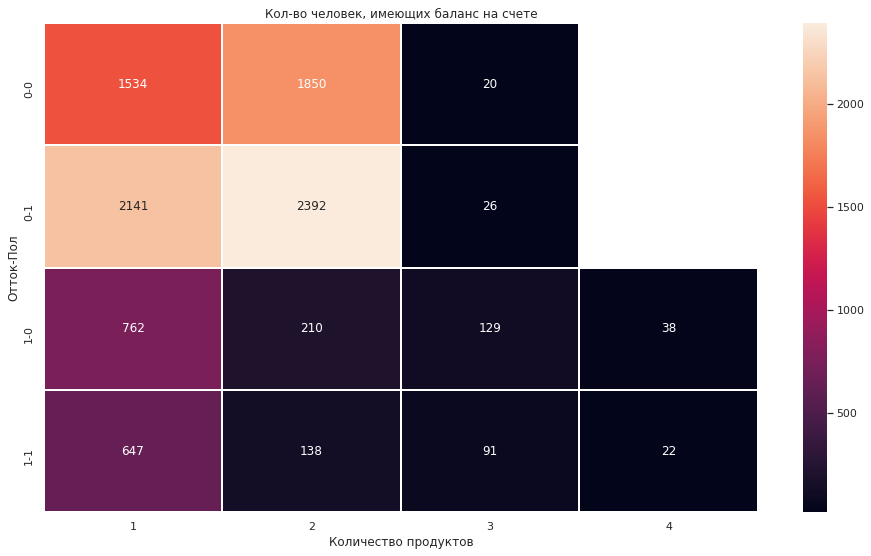

In [39]:
data_pivot = data.pivot_table(
    index=['churn', 'gender'], columns='products', values='balance', aggfunc='count'
)

sns.set(style='white')
plt.figure(figsize=(16, 9))
plt.title('Кол-во человек, имеющих баланс на счете')
sns.heatmap(data_pivot, annot=True, fmt='.0f', linewidths=1, linecolor='white')
plt.xlabel('Количество продуктов') 
plt.ylabel('Отток-Пол'); 




Чем большим числом продуктов пользуются клиенты, тем выше вероятность нулевого баланса. Возможно это клиенты, которые не живут по средствам и перекрывают один кредит другим.

In [40]:
data.groupby('products').mean().T



products,1,2,3,4
userid,1.573237e+07,1.573484e+07,1.574182e+07,1.571936e+07
score,6.491210e+02,6.521887e+02,6.481053e+02,6.535833e+02
city,1.745673e+00,1.742048e+00,1.857143e+00,1.633333e+00
gender,5.483871e-01,5.511983e-01,4.398496e-01,3.666667e-01
age,3.967309e+01,3.775359e+01,4.319549e+01,4.568333e+01
objects,4.974626e+00,5.051852e+00,5.003759e+00,5.300000e+00
balance,9.849455e+04,5.169675e+04,7.533970e+04,9.365800e+04
creditcard,7.037766e-01,7.071895e-01,7.142857e-01,6.833333e-01
loyalty,5.041306e-01,5.328976e-01,4.248120e-01,4.833333e-01
estimated_salary,9.948726e+04,1.004520e+05,1.043181e+05,1.047637e+05


In [41]:
data.drop(['userid'], axis=1).groupby('products').mean()



,score,city,gender,age,objects,balance,creditcard,loyalty,estimated_salary,churn
products,,,,,,,,,,
1,649.120968,1.745673,0.548387,39.673092,4.974626,98494.554688,0.703777,0.504131,99487.257812,0.277144
2,652.188671,1.742048,0.551198,37.753595,5.051852,51696.750000,0.707190,0.532898,100452.015625,0.075817
3,648.105263,1.857143,0.439850,43.195489,5.003759,75339.695312,0.714286,0.424812,104318.132812,0.827068
4,653.583333,1.633333,0.366667,45.683333,5.300000,93658.000000,0.683333,0.483333,104763.726562,1.000000


Выводы:
Сегментация пользователей по числу продуктов показала,что:
Большинство пользователей пользуются 1-2 продуктами.
Чаще всего в отток уходят пользователи имеющие 3-4 продукта(видимо это перекредитовывание).

Чем старше клиент, тем болим числом продуктов он пользуется(пиковые значения в категории 40-50 лет, далее они снижаются).

Число  банковских продуктов прямо слабо коррелирует с количеством объектов недвижимости у клиента. 
Чем большим числом продуктов пользуется клиент, тем ниже его баланс.
Зарплата имеет слабую связь с числом продуктов(у клиентов с четырьмя продуктами самая высокая средняя зарплата,но у клиетов с 1-3 продуктами она почти одинакова).
Есть весомаые различия в географии клиентов Ростов Великий имеет самый большой отток, а Ярославль наименьший, но показатели немногим лучше Рыбинска.
В итоге можно выделить четыре сегмента:
Первый
1 Баллы  - 649  баллов.
Гендер - Мужчин больше чем женжин на 4.8% ;
Возраст - 39,67 года 
5 объектов недвижимости
Пользуется 1 продукт банка
Средняя зарплата - 99487 руб.
Отток 27.7%
Второй
1 Баллы  - 652  балла. 
Гендер - Мужчин больше чем женжин на 5.1% ;
Возраст - 37,75 года 
5 объектов недвижимости
Пользуется 2 продукта банка
Средняя зарплата - 100452 руб.
Отток 7.5%
Третий
1 Баллы  - 648  балла. 
Гендер -Женщин, больше чем мужчин на 6.1% ;
Возраст - 43,19 года 
5 объектов недвижимости
Пользуется 3 продукт банка
Средняя зарплата - 104318 руб.
Отток 82.7%
Четвертый
1 Баллы  - 653  балла. 
Гендер -Женщин, больше чем мужчин на 23.4% ;
Возраст - 45,68 года 
5 объектов недвижимости
Пользуется 4 продукт банка
Средняя зарплата - 104763 руб.
Отток 100%

### Проверка гипотез 

Итак, в предыдущем пункте мы определили, что у нас имеется 4 признака, имеющих корреляцию с целевой переменной. С учётом того, что перед нами также поставлена задача проверить гипотезу о различии доходов у клиентов в оттоке / не в оттоке, всего нужно проверить 4 гипотезы:

гипотезу влиянии доходов;
гипотезу о влиянии количества продуктов;
гипотезу влиянии возраста;
гипотезу различиях по полу.

In [42]:
#Проверим размеры выборок:
print(
    'Размеры выборок составляют: для попавших в отток - {}, для оставшихся в банке - {}'.format(
        len(data.query('churn == 1')),
        len(data.query('churn == 0'))
    )
)

Размеры выборок составляют: для попавших в отток - 2037, для оставшихся в банке - 7963


Размеры выборок значительно отличаются, но это имеющиеся данные. Так как все признаки, по которым будет осуществляться проверка гипотез, имеют отличное от нормального распределение, то для проверки мы будем использовать критерий Манна-Уитни. Уровень статистической значимости принимаем равным 0,05.

Для того чтобы скомпенсировать накопление ошибки первого рода применим поправку Бонферрони - разделим выбранный уровень значимости на количество проводимых тестов.

#### Гипотеза о  влиянии доходов для клиентов в оттоке / не в оттоке

Сформулируем гипотезу:

H0: среднее значение дохода клиентов, ушедших в отток *равно* среднему значению дохода клиентов, оставшихся с банком

H1: среднее значение дохода клиентов, ушедших в отток *отличается* от среднего значению дохода клиентов, оставшихся с банком

In [43]:
# формируем выборки
sample_A = data.query('churn == 0')['estimated_salary']
sample_B = data.query('churn == 1')['estimated_salary']

In [44]:
# задаём уровень критерия статистической значимости
alpha = 0.05

# количество тестов
n_test = 4

# рассчитываем итоговый уровень критерия статистической значимости с учётом поправки Бонферрони
alpha_corr = alpha / n_test

# проводим тест
result = st.mannwhitneyu(sample_A, sample_B)

# получаем значение p-value
p_value = result.pvalue

# сравниваем полученное значение с критерием
if p_value > alpha_corr:
    print('Не получилось отвергнуть нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза не отвергнута, т.е. статистически значимых различий между средними двух выборок не обнаружено. Посмотрим на относительную разницу средних:

In [45]:
print('{0:.2%}'.format(sample_B.mean() / sample_A.mean() - 1))

1.73%


 Разница всего 1.73% что не так существенно разница.

#### Гипотеза о различии количества используемых продуктов  у клиентов в оттоке / не в оттоке

In [46]:
# формируем выборки
sample_A = data.query('churn == 0')['products']
sample_B = data.query('churn == 1')['products']

In [47]:
# проводим тест
result = st.mannwhitneyu(sample_A, sample_B)

# получаем значение p-value
p_value = result.pvalue

# сравниваем полученное значение с критерием
if p_value > alpha_corr:
    print('Не получилось отвергнуть нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

Отвергаем нулевую гипотезу


In [48]:
print('{0:.2%}'.format(sample_B.mean() / sample_A.mean() - 1))




-4.47%


Относительная разница  средних заметная и составляет -4.47 %

#### Гипотеза о различии среднего возраста для   клиентов в оттоке / не в оттоке

Сформулируем гипотезу:

H0: среднее значение возраста клиентов, ушедших в отток *равно* среднему значению возраста клиентов, оставшихся с банком

H1: среднее значение возраста клиентов, ушедших в отток *отличается* от среднего значению возраста клиентов, оставшихся с банком

In [49]:
# формируем выборки
sample_A = data.query('churn == 0')['age']
sample_B = data.query('churn == 1')['age']

In [50]:
# проводим тест
result = st.mannwhitneyu(sample_A, sample_B)

# получаем значение p-value
p_value = result.pvalue

# сравниваем полученное значение с критерием
if p_value > alpha_corr:
    print('Не получилось отвергнуть нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу, т.к между средними значениями имеются статистически значимые различия. 

In [51]:
#Посмотрим на относительную разницу средних:
print('{0:.2%}'.format(sample_B.mean() / sample_A.mean() - 1))

19.86%


Разница  в 19.86% является довольно большой.

#### Гипотеза о различии по полу у клиентов в оттоке / не в отток

Сформулируем гипотезу:

H0: доля клиентов - женщин, ушедших в отток (признак gender = 0) равна доле клиентов - мужчин (признак gender = 1), ушедших в отток

H1: доля клиентов - женщин, ушедших в отток (признак gender = 0) не равна доле клиентов - мужчин (признак gender = 1), ушедших в отток

In [52]:
# сформируем выборки
# 1 - с количеством клиентов со значениям признака gender 0 и 1
# 2 - с количеством клиентов, ушедших в отток, со значениям признака gender 0 и 1, соответственно
sample_A = list(data.query('churn == 0').groupby('gender').agg({'userid':'count'})['userid'])
sample_B = list(data.query('churn == 1').groupby('gender').agg({'userid':'count'})['userid'])


In [53]:
# напишем функцию для проверки равенства долей
def z_test(before, after):
    successes = np.array(after)
    trials = np.array(before)
     
    p1 = successes[0]/trials[0]
    p2 = successes[1]/trials[1]
    
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

    difference = p1 - p2

    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

    distr = st.norm(0, 1) 

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    return p_value

In [54]:
# получаем значение p-value
p_value = z_test(
    sample_A,
    sample_B
)

# сравниваем полученное значение с критерием
if p_value > alpha_corr:
    print('Не получилось отвергнуть нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу т.к. между средними значениями имеются статистически значимые различия. Посмотрим на относительную разницу средних:

In [55]:
print('{0:.2%}'.format(sample_B[0] / sample_A[0] *  sample_A[1] / sample_B[1] - 1))

69.87%


Разница средних составляет 69.87%, что довольно много.

### Кластеризация пользователей и определение портрета "уходящего" клиента.


Для кластеризации будем использовать данные только тех клиентов, у которых не было пропусков в колонке balance. 

In [ ]:
# выделяем данные
X = data.query('balance > -1').drop('userid', axis=1)

# приводим данные к единому стандарту
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)
# сохраняем таблицу связей
linked = linkage(X_sc, method = 'ward')

# строим дендрограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархия кластеров клиентов "Метанпромбанка" ')
plt.show()

Исходя из визуализации на дендрограмме можно выделить три кластера.

In [ ]:
# создаём модель k_means с числом кластеров 3
k_means = KMeans(n_clusters=3)

# прогнозируем кластеры для наблюдений
labels = k_means .fit_predict(X_sc)

# записываем результаты в датасет
good_balance = X
good_balance['cluster'] = labels

In [ ]:
#Рассчитаем средние значений признаков для каждого кластера
display(
    good_balance.groupby('cluster').agg('mean').T.apply(lambda s: s.apply('{0:.2f}'.format))
)

Анализ данных приведенных в таблице показал, что нам необходимо рассмотреть кластер номер 2, который полностью ушел в отток. 

In [ ]:
# выделим номер кластера, склонного к оттоку в переменную, т.к. при перезапуске ноутбука номера кластеров сменятся
churn_cluster = max(map(lambda x: x if round(good_balance.groupby('cluster').agg('mean').loc[x, 'churn'].mean()) == 1 else -1,
        good_balance['cluster'].unique()))
    

In [ ]:
# сначала в цикле построим графики распределения основных признаков для этого кластера
for i in ['age','gender','products','estimated_salary','balance','objects','score']:
    show_chart(
        good_balance.query('cluster == @churn_cluster'),
        i,
        False)

In [ ]:
# распределение клиентов в оттоке по городам для наглядности выведем как круговую диаграмму
ax = good_balance.query('cluster == @churn_cluster').groupby('city').agg({'churn':'count'}).plot.pie(
    labels=city_names_charts,
    y='churn',
    figsize=(12,12),
    title='Распределение количества клиентов в оттоке по городам присутствия банка',
    legend=True,
    autopct='%1.2f%%')

ax.set_ylabel('Доля оттока')
ax.set_xlabel('Город')

plt.show()

Выводы:
Кластер, который полностью ушел в в отток
средний возраст клиентов  45 лет(39 и 36 лет в других кластерах);
у 70% есть кредитная карта(но в других кластерах та же картина);
в среднем у клиентов 5 объектов недвижимости(как и в других кластерах);
открыто в среднем 1.47 продукта(это немного выше, чем в других кластерах где их число 1.36 и 1.37);
только 36% клинетов имеют активный статус;
доля женщин также выше(55%), чем  вдругих кластерах (41% и 43%);
большая часть клиентов кластера живёт в городе Рыбинск.

Теперь сравним полученные результаты рассмотренного кластера со средними показателями тех кто ушел в отток и тех, кто остался. 

In [ ]:
# создадим сводную таблицу с показателями
reviev_ultimate = data.pivot_table(
    index='churn',
    aggfunc='mean'
).T.apply(
    lambda s: s.apply('{0:.2f}'.format)
).reset_index().rename(
    columns = {
        'index':'indicator',
        1:'mean_values'
    }
).merge(
    good_balance.loc[
        :,
        good_balance.columns != 'churn'
    ].groupby('cluster').agg('mean').T.apply(
        lambda s: s.apply('{0:.2f}'.format)
    ).reset_index().rename(
        columns = {
            'index':'indicator',
            churn_cluster:'cluster_values'
        }
    ),
    on='indicator'
)[['indicator', 'mean_values', 'cluster_values']]

In [ ]:
# приведём типы
reviev_ultimate['mean_values'] = pd.to_numeric(reviev_ultimate['mean_values'], downcast='float')
reviev_ultimate['cluster_values'] = pd.to_numeric(reviev_ultimate['cluster_values'], downcast='float')

In [ ]:
# рассчитаем относительную разницу
reviev_ultimate['different'] = round((1 - reviev_ultimate['cluster_values'] / reviev_ultimate['cluster_values']) * 100,2)

In [ ]:
# отформатируем
reviev_ultimate[['mean_values', 'cluster_values', 'difference']] = reviev_ultimate[['cluster_values', 'cluster_values', 'different']].apply(
lambda s: s.apply('{0:.2f}'.format)
)

# выведем на экран
display(reviev_ultimate)

Данные сводной таблицы показали практически те же результаты, что и кластеризация, кроме показателя balance, т.к. мы не учитывали при кластеризации пользователей с отсутствием данных о балансе. Незначительная разница также есть по городам и по полу.  

#### Опишем портерет клиента наиболее склонного к оттоку(на основе показателей)

к оттоку больше склонны женщины;
средний возраст клиента в оттоке 45 лет и чем старше клиент, тем более он склонен уходить в отток;
клиенты  проживающие в Рыбинске более склонны к оттоку;
зарплата клиентов слабо кореллирует со склонностью к оттоку, но у клиентов в оттоке медиана зарплаты выше  100 тысяч.
с увеличением числа используемых продуктов растет вероятность ухода клиента в отток (видимо ввиду увеличения закредитованности)
Наиболее перспективными и более надежными являются клиенты:
мужчины;
возраст клиентов которых не превышает  44 года;
клиенты, которые отличаются более высокой активностью(регулярно совершающие операции);
не проживающие в Рыбинске;
клиенты, число продуктов у которыз не превышает двух.

### Общие выводы

В результате проведенного анализа нами составлен портрет клиента склонного к оттоку.Выделены основные черты клиентов склонных к оттоку:

к оттоку больше склонны женщины;
средний возраст клиента в оттоке 45 лет и чем старше клиент, тем более он склонен уходить в отток;
клиенты  проживающие в Рыбинске более склонны к оттоку;
зарплата клиентов слабо кореллирует со склонностью к оттоку, но у клиентов в оттоке медиана зарплаты выше  100 тысяч.
с увеличением числа используемых продуктов растет вероятность ухода клиента в отток (видимо ввиду увеличения закредитованности)
Наиболее перспективными и более надежными являются клиенты:
мужчины;
возраст клиентов которых не превышает  44 года;
клиенты, которые отличаются более высокой активностью(регулярно совершающие операции);
не проживающие в Рыбинске;
клиенты, число продуктов у которыз не превышает двух.
Нами проверены четыре  статистические гипотезы:
 Гипотеза о влиянии доходов на различии доходов для клиентов в оттоке / не в оттоке
 Гипотеза о различии среднего возраста для клиентов в оттоке / не в оттоке
 Гипотеза о различии количества используемых продуктов у клиентов в оттоке / не в оттоке
Гипотеза о различии по признаку gender у клиентов в оттоке / не в оттоке
Можно утверждать, что:

доход, клиентов, которые уходят в отток и остаются  равен;
средний возраст отточных и неотточных клиентов различается;
количество используемых продуктов у клиентов в оттоке и остающихся клиентов отличаются;
женищины более склонны уходить в отток,чем мужчины;

Также нами была проведена кластеризация клиентов:

Используя метод KMeans, нами выделено три кластера,средние значения характеристик по кластерам не противоречат и в целом подтверждают  полученные выводы о портрете клиента уходящего в отток. 

Общие рекомендации отделу маркетинга:

1 - необходимо оценить качество  предоставляемых услуг, в особенности для отточных клиентов:

Необходимо оценить качество обслуживания в городе Рыбинск и Ярославль, возможно методом "контрольной закупки". Непосредственный пользовательский опыт в результате проверки позволит выявить уязвимости и выявить проблемы(в частности с нулевым балансом у 36 % пользователей). Помимо этого, зная что средний отточный клиент старше 45 и  он с большей долей вероятности женщина и имеющий несколько объектов недвижимости, возможно провести запуск партнерских программ с магазинами женской одежды, товаров для сада и дома(Леруа Мерлен вроде еще не в оттоке), партнерские программы с салонами красоты и производителями косметики для женщин в возрасте 40+. 

2 - создать систему перманентного контроля качества предоставляемых услуг и потребляемых продуктов:
Наиболее действенным может быть создание системы техподдержки непосредственно в приложении банка, при этом периодически, приложение может предлагать клиенту оценить качество предоставленных услуг, что позволит собирать свежие данные.
Также возможно проведение обзвонов клиентов, и тем, кто активно будет участвовать в улучшении работы банка возможно предоставление бонусов и специальных условий обслуживания. 
3 - стимулировать активность клиентов, не допуская повышения у клиента показателей, которые характеризуют отточных клиентов(активность, баланс):
Также, возможно стимулировать клиентов сохранять ненулевой баланс процентом на остаток по счету(сделав его прогрессивным, чтобы стимулировать клиентов держать большие суммы, но здесь необходимо провести дополнительные расчеты), а активность стимулировать системой кэшбека.
4- стимулировать клиентов ускорять потребление банковских продуктов т.к. увеличение числа продуктов связано с вероятностью оттока клиентов:
это возможно за счет программ рефинансирования, новогодних акций(в новый год без долгов к примеру с последующим розыгрышем призов или бонусами активным и лояльным клиентам). Это также может улучшить квартальные бизнес показатели банка, но для конкретной реализации программ требуются дополнительные исследования. 



Вывод UPD-описание кластеров.
Рекомендации по каждому кластеру
Кластер №0:

Баллы  - 649.4 баллов. 
Гендер - Мужчина больше на 7%;
Возраст - 35.5 года (45 лет), наибольший отток - в категории от 48 до 55 лет;
5 объектов недвижимости, частый отток наблюдается у клиентов с 7 объектами;
Пользуется 1,37  продуктами банка, наибольший отток у клиентов с 3 и 4 продуктами;
Есть кредитка;
Не активны, отток наблюдается у неактивных клиентов;
Средняя зарплата - 101294 руб.
город Ярославль.

Кластер представлен №0 клиентами из Ярославля. Как мы видим, здесь представлены активные пользователи, использующие несколько банковских продуктов. Отток происходит у неактивных клиентов, которые используют(использовали) большое количество банковских продуктов, в том числе кредитные карты, и возможно клиентов не устраивает условия предлагаемых услуг и отсутствие персональных предложений. Предлагаются следующие решение:

Введение накопительного вклада пролонгированного действия (до года) с повышением ставки в последующие периоды,
Кредитная карта с более выгодными условиями для клиентов 35.5 лет преимущественно мужчин(удлиненный беспроцентный срок, скидки у партнеров Банка -  ритейлеры, магазины для дома и ремонта, магазины автотоваров. автозаправки)
Дебетовая карта с повышенным кэшбэком на покупки у партнеров Банка - продуктовые ритейлеры, магазины для дома и ремонта, автозаправки.
Кредитные продукты для клиентов с низким рейтингом(с более высокими ставками и более короткими беспроцентными сроками ставками кредитования и короткими сроками).
Карта рассрочки для женщин - на покупки в магазинах косметики, одежды и салонах красоты.



Кластер №1:
Баллы  - 655.4  баллов. 
Гендер - Мужчина больше на 9%;
Возраст - 38.8 лет, наибольший отток - в категории от 46 до 53 лет;
5 объектов недвижимости (4,6 объекта), частый отток наблюдается у клиентов с 9 объектами;
Пользуется 1,36  продуктами банка,наибольший отток у клиентов с 3 и 4 продуктами;
Есть кредитка;
Активны, отток наблюдается среди активных клиентов;
Средняя зарплата - 99898 руб.;
город Ростов Великий.

Кластер №1  похож на кластер №0, с тем условием, что кредитный рейтинг здесь выше(видимо в данном кластере пользуются услугами не только нашего банка) городе присутствия Ростов Великий, процент мужчин немного больше(9% вместо 7%).В связи с тем, что портреты ушедших клиентов сходны, предлагаются схожие для кластера №0 решения, с изменениями в:
В связи с тем, что клиенты активны и имеют более высокий средний рейтинг, возможно предложить  программу рефинансирование кредитов других банков.
Так как в кластере больше мужчин, то минимизируем предложения от партнеров для женщин.

Кластер №2:
Баллы  - 645.97  
Гендер -Женщин больше на 5%;
Возраст - 44.8  лет, наибольший отток - в категории от 42 до 65 лет;
5 объектов недвижимости, частый отток наблюдается у клиентов с 5 и 9 объектами;
Пользуется 1,47  продуктами банка, наибольший отток у клиентов с 2-4 продуктами;
Есть кредитка;
Активны, отток наблюдается у активных клиентов;
Средняя зарплата - 101370 руб.
город Рыбинск.

В этом кластере наблюдается максимальный отток клиентов, клиенты проживают в Рыбинске Здесь отток наблюдается у клиентов предпенсионного возраста (44.8 лет), большая часть клиентов женщины,  используются больше всего  банковских продуктов. Здесь предлагаются следующие решения :

Введение накопительного вклада пролонгированного действия (до года) с повышением ставки в последующие периоды;
Накопительные вклады с повышенной ставкой в связке с пенсионными социальными картами - для категории 55-65 лет;
Дебетовая карта с повышенным кэшбэком на покупки у партнеров Банка - продуктовые ритейлеры, магазины для  сада, дома и ремонта, автозаправки. Также здесь необходимо расширить партнерские предложения за счет сектора медицинских товаров и услуг, что наиболее актуально для клиентов в данной возрастной категории;
Кредитные продукты для клиентов с низким  рейтингом и низким доходом (с повышенными ставками кредитования и короткими сроками);
Для клиентов предпенсионного возраста (45+ лет), возможно, будут интересны инвестиционные продукты(паевые фонды);
Карта рассрочки для женщин - на покупки в магазинах косметики, одежды и товаров для дома.
Также я бы рекомендовала обратить внимание на клиентское обслуживание в Рыбинскиет.к. возможно, что причины оттока связаны с работой отделений банка непосредственно в городе, а не являются структурной проблемой всего банка.
